<a href="https://colab.research.google.com/github/Franruaben11/HeartDisease/blob/main/heartdiseasep1(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Enfermedades Cardíacas

# Importe de librerias

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from google.colab import drive
import os
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [ ]:
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
print(os.getcwd())
os.chdir("/content/gdrive/MyDrive/DataScience2/ProyectoHeart")

Mounted at /content/gdrive
/content


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 27.4 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 872.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356239 sha256=96bddd7cf4f5ba92b5f65a686e9a36920f7251d420ca5769282e5bbc9688946e
  Stored in directory: /tmp/pip-ephem-wheel-cache-z9vk2vcr/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=ae76247a5eb863258c78560a8d5e34412f3fecb4ec3f55a1e22211e2661782f3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [ ]:
import pandas_profiling

<ipython-input-4-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling



# Carga del dataset

In [ ]:
df = pd.read_csv("heart_2022_with_nans.csv")

# Informacion del dataset

In [ ]:
df.columns.values

array(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'], dtype=object)

**State**: El estado de residencia del individuo.

**Sex**: El sexo del individuo (por ejemplo, 'Male' o 'Female').

**GeneralHealth**: Una evaluación general de la salud del individuo (por ejemplo, 'Excellent', 'Very good', 'Good', 'Fair', 'Poor').

**PhysicalHealthDays**: Número de días en el último mes que el individuo reportó tener mala salud física.

**MentalHealthDays**: Número de días en el último mes que el individuo reportó tener mala salud mental.

**LastCheckupTime**: Tiempo desde la última vez que el individuo tuvo un chequeo médico (por ejemplo, 'Within the past year', '1-2 years ago', etc.).

**PhysicalActivities**: Si el individuo realiza actividades físicas (por ejemplo, 'Yes' o 'No').

**SleepHours**: Número promedio de horas de sueño por noche.
RemovedTeeth: Número de dientes removidos.

**HadHeartAttack**: Si el individuo ha tenido un ataque cardíaco (por ejemplo, 'Yes' o 'No').

**HadAngina**: Si el individuo ha tenido angina (por ejemplo, 'Yes' o 'No').

**HadStroke**: Si el individuo ha tenido un derrame cerebral (por ejemplo, 'Yes' o 'No').

**HadAsthma**: Si el individuo tiene asma (por ejemplo, 'Yes' o 'No').

**HadSkinCancer**: Si el individuo ha tenido cáncer de piel (por ejemplo, 'Yes' o 'No').

**HadCOPD**: Si el individuo tiene Enfermedad Pulmonar Obstructiva Crónica (COPD, por sus siglas en inglés) (por ejemplo, 'Yes' o 'No').

**HadDepressiveDisorder**: Si el individuo tiene un trastorno depresivo (por ejemplo, 'Yes' o 'No').

**HadKidneyDisease**: Si el individuo tiene enfermedad renal (por ejemplo, 'Yes' o 'No').

**HadArthritis**: Si el individuo tiene artritis (por ejemplo, 'Yes' o 'No').

**HadDiabetes**: Si el individuo tiene diabetes (por ejemplo, 'Yes' o 'No').

**DeafOrHardOfHearing**: Si el individuo es sordo o tiene dificultades auditivas (por ejemplo, 'Yes' o 'No').

**BlindOrVisionDifficulty**: Si el individuo es ciego o tiene dificultades visuales (por ejemplo, 'Yes' o 'No').

**DifficultyConcentrating**: Si el individuo tiene dificultades para concentrarse, recordar o tomar decisiones (por ejemplo, 'Yes' o 'No').

**DifficultyWalking**: Si el individuo tiene dificultades para caminar o subir escaleras (por ejemplo, 'Yes' o 'No').

**DifficultyDressingBathing**: Si el individuo tiene dificultades para vestirse o bañarse (por ejemplo, 'Yes' o 'No').

**DifficultyErrands**: Si el individuo tiene dificultades para hacer mandados solo (por ejemplo, 'Yes' o 'No').

**SmokerStatus**: Estado de fumador del individuo (por ejemplo, 'Current smoker', 'Former smoker', 'Never smoked').

**ECigaretteUsage**: Si el individuo usa cigarrillos electrónicos (por ejemplo, 'Yes' o 'No').

**ChestScan**: Si el individuo ha tenido un escaneo de tórax (por ejemplo, 'Yes' o 'No').

**RaceEthnicityCategory**: Categoría de raza/etnia del individuo (por ejemplo, 'White', 'Black', 'Asian', etc.).

**AgeCategory**: Categoría de edad del individuo (por ejemplo, '18-24', '25-34', '35-44', etc.).

**HeightInMeters**: Altura del individuo en metros.

**WeightInKilograms**: Peso del individuo en kilogramos.

**BMI**: Índice de Masa Corporal del individuo.

**AlcoholDrinkers**: Si el individuo consume alcohol (por ejemplo, 'Yes' o 'No').

**HIVTesting**: Si el individuo ha sido sometido a una prueba de VIH (por ejemplo, 'Yes' o 'No').

**FluVaxLast12**: Si el individuo ha recibido una vacuna contra la gripe en los últimos 12 meses (por ejemplo, 'Yes' o 'No').

**PneumoVaxEver**: Si el individuo ha recibido una vacuna contra el neumococo alguna vez (por ejemplo, 'Yes' o 'No').

**TetanusLast10Tdap**: Si el individuo ha recibido una vacuna contra el tétanos en los últimos 10 años (Tdap) (por ejemplo, 'Yes' o 'No').

**HighRiskLastYear**: Si el individuo ha sido identificado como de alto riesgo en el último año (por ejemplo, 'Yes' o 'No').

**CovidPos**: Si el individuo ha dado positivo en una prueba de
COVID-19 (por ejemplo, 'Yes' o 'No').

In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No



Podemos ver las 5 primeras filas del dataset








In [ ]:
df.shape

(445132, 40)

El dataset antes de ser limpiado tiene 445132 filas y 40 columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

**Podemos resaltar los siguiente.**

1.   Tenemos muchos datos de tipo "object"
2.   Tenemos nulls en todas las columnas exceptuando "Sex" y "State"



# Estadistica de datos

Prefiero hacer enfasis en estos datos y no en algunas otras columnas que las voy a pasar a tipo numeric

In [ ]:
#Descripcion total del dataframe transpuesto
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,434205.0,4.347919,8.688912,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,436065.0,4.382649,8.387475,0.00,0.00,0.00,5.00,30.00
SleepHours,439679.0,7.022983,1.502425,1.00,6.00,7.00,8.00,24.00
HeightInMeters,416480.0,1.702691,0.107177,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,403054.0,83.074470,21.448173,22.68,68.04,80.74,95.25,292.57
BMI,396326.0,28.529842,6.554889,12.02,24.13,27.44,31.75,99.64




1.   ***SleepHours***: Revisar posibles outliers, ¿24 y 0 horas de sueño son posibles?. Sus datos no varian eso quiere decir que la mayoria duermen 7 horas
2.   ***PhysicalHealtDays y MentalHealthDays***: La mediana es menor que la media, esto puede decirnos que **estan sesgadas hacia los derecha**. Ademas **vemos cierta similitud entre ambas**. Tienen aproximadamnte un std = 8.5 eso quiere decir que **tiene una variacion alta**
3.   ***WeightInKilograms***: Muy alta variabilidad en el peso de las personas

# Funciones

Funcion para pasar valores categoricos que solo contienen "YES" y "TRUE" a 1 y 0

In [ ]:
#Pasamos los valores yes a True y no a False
def yes_no_to_bool(x):
  if x == "Yes":
    return 1
  elif x == "No":
    return 0
  else:
    return x


In [ ]:
#Completar bmi, weight, height con regla de 3
def complete_BMI_height_weight(dataframe):
  for index, row in dataframe.iterrows():
    if (pd.isna(row["BMI"])):
      dataframe.at[index,"BMI"] = row["WeightInKilograms"] / (row["HeightInMeters"] ** 2)
    elif (pd.isna(row["HeightInMeters"])):
      dataframe.at[index,"HeightInMeters"] = np.sqrt(row['WeightInKilograms'] / row['BMI'])
    else:
      dataframe.at[index,'WeightInKilograms'] = row['BMI'] * (row['HeightInMeters'] ** 2)

In [ ]:
#Obtener porcentaje de nulos de una columna
def get_null_percentage(column):
  return (column.isna().sum() / len(column)) * 100

In [ ]:
#Completar cuando BMI, weight Y height son nulos
def tres_val_null(valor, moda_bmi, moda_weight, moda_height):
    if pd.isnull(valor["BMI"]) and pd.isnull(valor["WeightInKilograms"]) and pd.isnull(valor["HeightInMeters"]):
        return pd.Series({
            "BMI": moda_bmi,
            "WeightInKilograms": moda_weight,
            "HeightInMeters": moda_height
        })
    else:
        return valor

In [ ]:
# Función para calcular y graficar porcentajes
def plot_percentage(df, var, target):
    # Calcular los porcentajes
    counts = df.groupby([var, target]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Crear el gráfico de barras con porcentajes
    percentages.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Distribución de Ataques Cardíacos por {var}')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45)
    plt.legend(title=target)
    plt.show()

# Entender variable objetivo

In [ ]:
df["HadHeartAttack"].value_counts()

HadHeartAttack
No     416959
Yes     25108
Name: count, dtype: int64

Podemos ver como hay un desbalance. Tenemos muchos mas datos de un tipo que de otro

# Organizo dataframe

Reemplazo valores Hombrey Mujer a binario

In [ ]:
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

Con la funcion **yes_no_to_bool** reemplazo "Yes" y "No" a True y False solo las columnas que tienen esos dos valores

In [ ]:
for col in df.columns:
    # chequea que solo tenga los valores 'Yes' y 'No'
    unique_values = df[col].dropna().unique()
    if set(unique_values).issubset({'Yes', 'No'}):
        # aplico la funcion yes_no_to_bool
        df[col] = df[col].apply(yes_no_to_bool)

podemos rescatar **2238** filas con regla de 3

In [ ]:
mascara = df[["BMI", "HeightInMeters", "WeightInKilograms"]].isna().sum(axis=1) == 1
df_1_null = df[mascara]
df_1_null.shape[0]

2238

Ejecuto la funcion para completar los valores NULL de "BMI","Height" y "Weight" con regla de 3

In [ ]:
complete_BMI_height_weight(df_1_null)

Actualizo df con los valores de df_1_null en las filas y columnas coincidentes

In [ ]:
df.update(df_1_null, overwrite=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  int64  
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  float64
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  float64
 10  HadAngina                  440727 non-null  float64
 11  HadStroke                  443575 non-null  float64
 12  HadAsthma                  443359 non-null  float64
 13  HadSkinCancer              44

# Visualizacion de datos

In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,0,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0.0,8.0,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,No
1,Alabama,0,Excellent,0.0,0.0,NaN,0.0,6.0,NaN,0.0,...,1.60,68.04,26.57,0.0,0.0,0.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,No
2,Alabama,0,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1.0,5.0,NaN,0.0,...,1.57,63.50,25.61,0.0,0.0,0.0,0.0,NaN,0.0,Yes
3,Alabama,0,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1.0,7.0,NaN,0.0,...,1.65,63.50,23.30,0.0,0.0,1.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,No
4,Alabama,0,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1.0,9.0,NaN,0.0,...,1.57,53.98,21.77,1.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,No


In [ ]:
df.dtypes

State                         object
Sex                            int64
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities           float64
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack               float64
HadAngina                    float64
HadStroke                    float64
HadAsthma                    float64
HadSkinCancer                float64
HadCOPD                      float64
HadDepressiveDisorder        float64
HadKidneyDisease             float64
HadArthritis                 float64
HadDiabetes                   object
DeafOrHardOfHearing          float64
BlindOrVisionDifficulty      float64
DifficultyConcentrating      float64
DifficultyWalking            float64
DifficultyDressingBathing    float64
DifficultyErrands            float64
SmokerStatus                  object
ECigaretteUsage               object
C

In [ ]:
#Cantidad de filas repetidas
df.duplicated().sum()

157

tenemos 157 filas repetidas, pero yo considero que pueden haber dos personas con los mismos resultados en el estudio por lo tanto no las elimino

<Axes: >

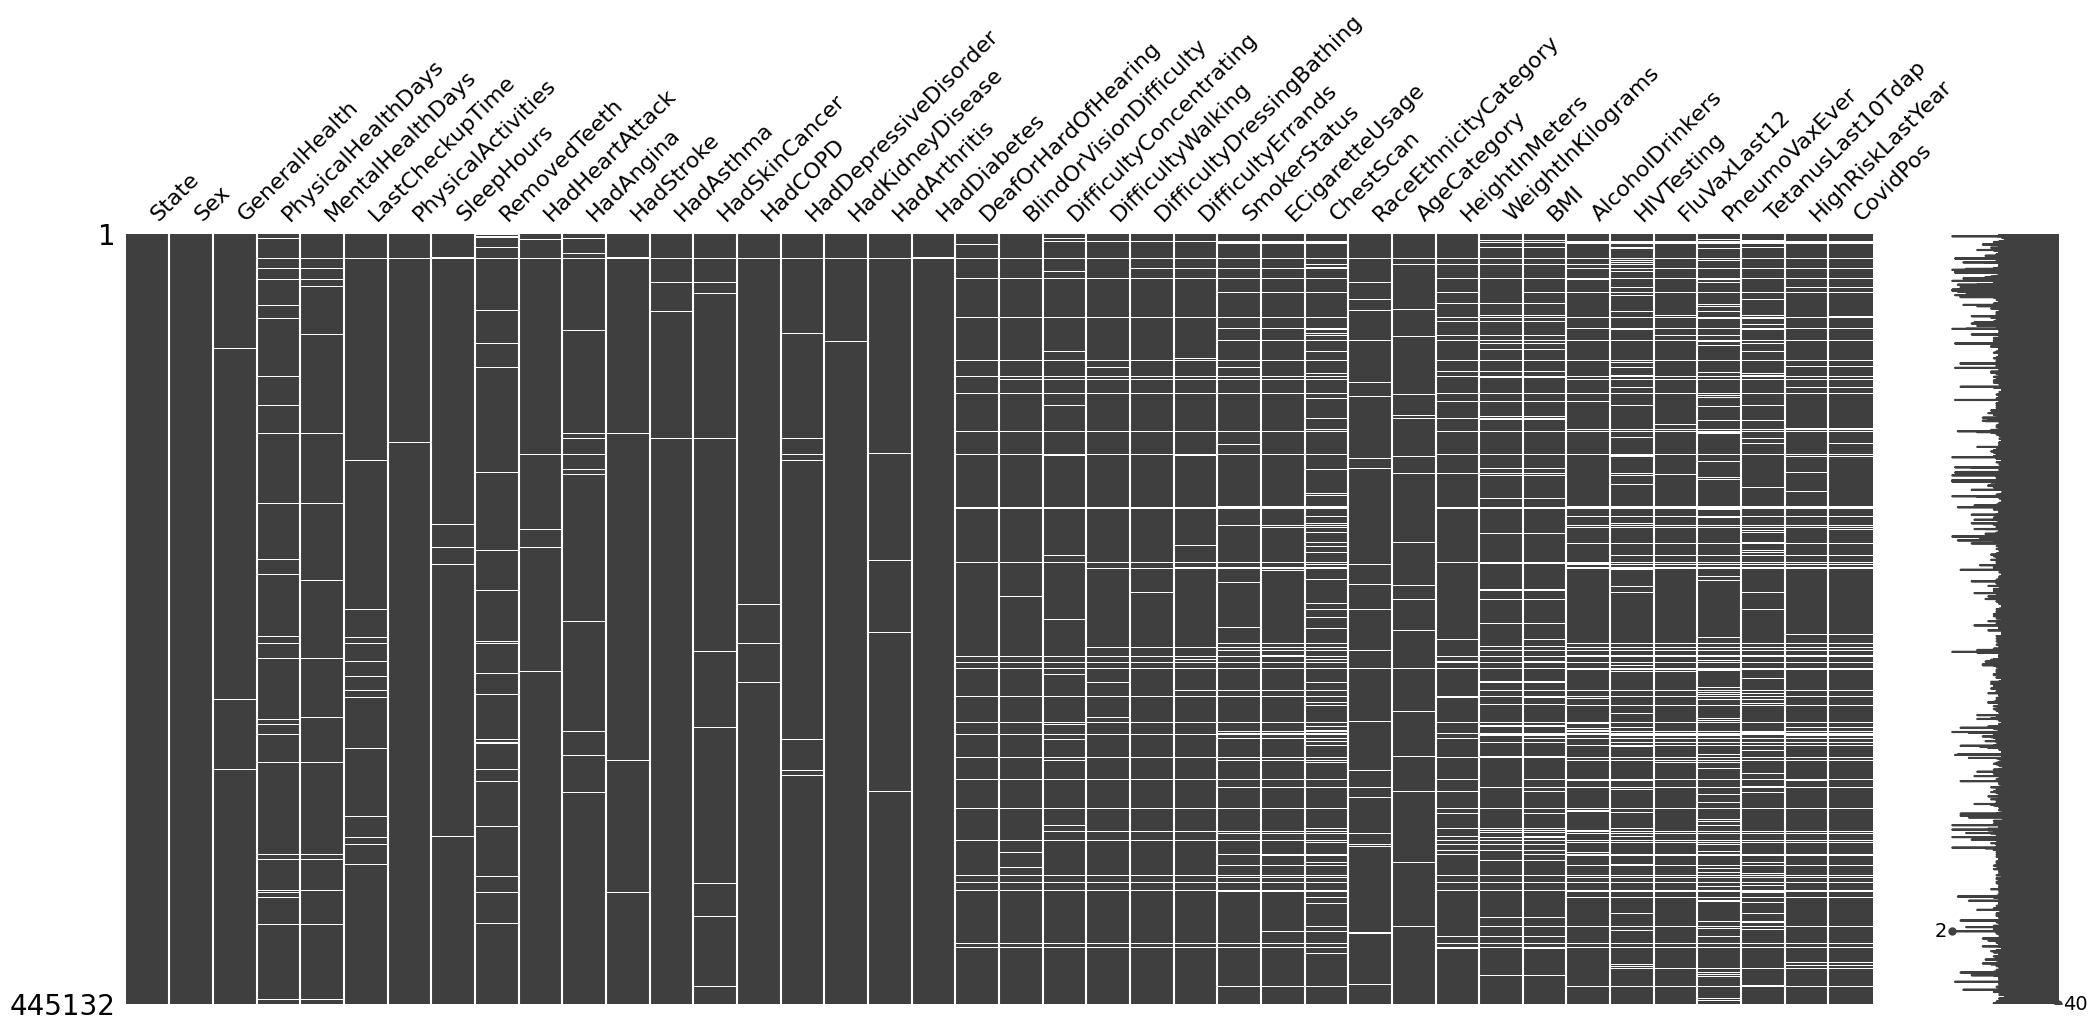

In [ ]:
msno.matrix(df)

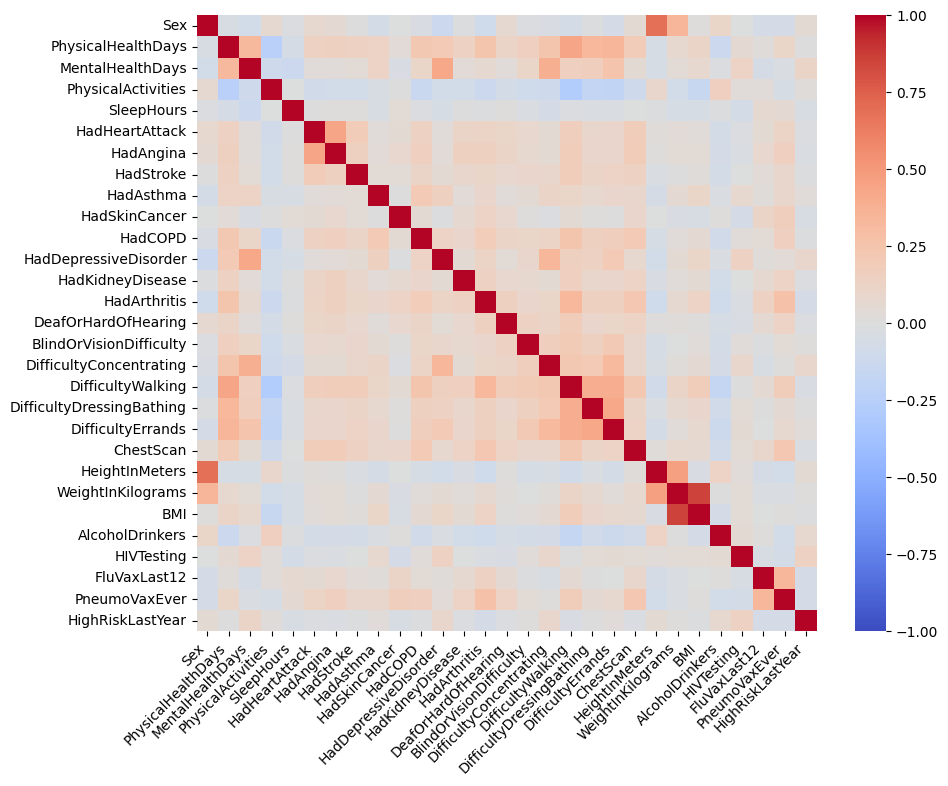

In [ ]:
df_numeric = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura para que las etiquetas se vean mejor
sns.heatmap(df_numeric.corr(), cmap='coolwarm', vmin=-1, vmax=1, xticklabels=True, yticklabels=True)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mejor visibilidad
plt.show()

El peso,altura y bmi deberia tener casi que un 100% de correlacion.Por redundancia podria se una opcion eliminar BMI.

Sex tiene alta correlacion con HeightInMeters

<ipython-input-27-dd26025c55df>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{x:.1f}%' for x in ax.get_xticks()])


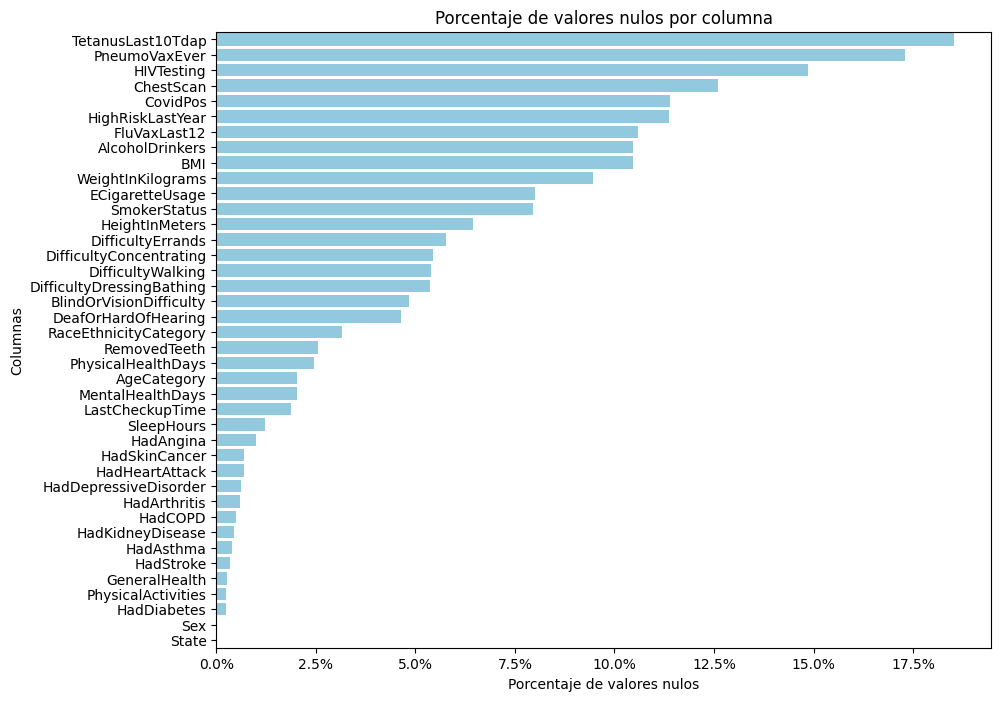

In [ ]:
null_percentages = df.isnull().mean() * 100
null_percentages = null_percentages.sort_values(ascending=False)

# Crear un gráfico de barras horizontal para visualizar los porcentajes de valores nulos
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=null_percentages.index, x=null_percentages.values, color='skyblue')

# Agregar etiquetas al gráfico
plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Columnas')
ax.set_xticklabels([f'{x:.1f}%' for x in ax.get_xticks()])
plt.show()

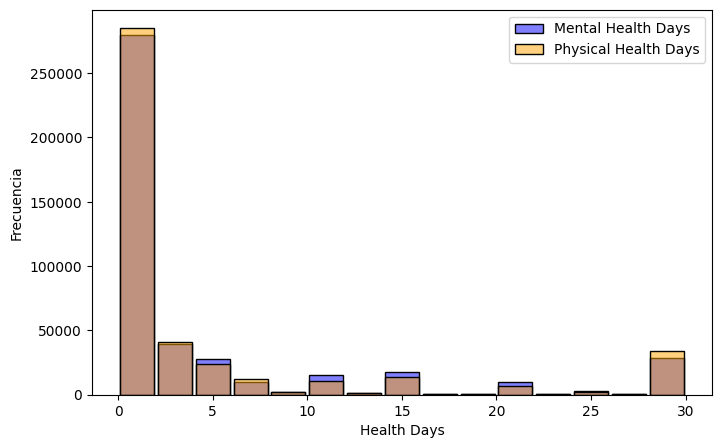

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(df['MentalHealthDays'], bins=15, shrink=0.9, color='blue', alpha=0.5, label='Mental Health Days')

sns.histplot(df['PhysicalHealthDays'], bins=15, shrink=0.9, color='orange', alpha=0.5, label='Physical Health Days')

plt.ylabel("Frecuencia")
plt.xlabel("Health Days")
plt.legend()

plt.show()

MentalHealthDays y PhysicalHealthDays tienen una distribucion muy similar y tienen un sesgo a derecha

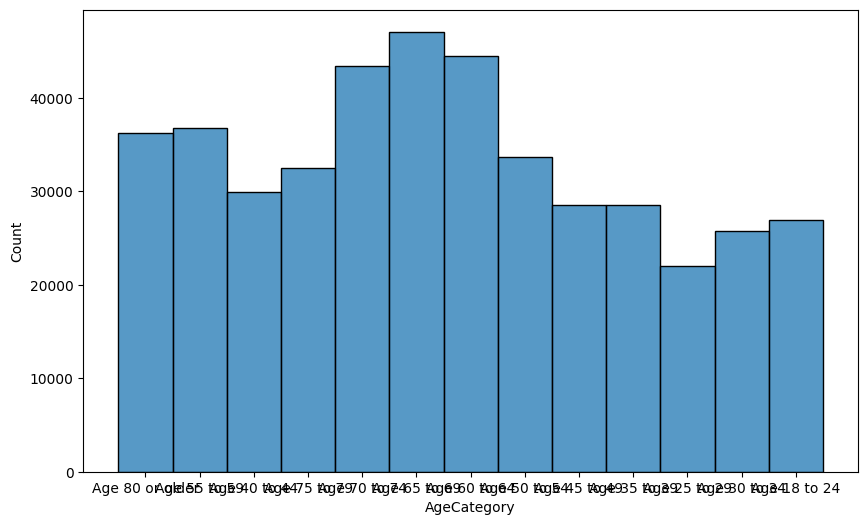

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AgeCategory'])
plt.show()

Para visualizar si AgeCategory esta sesgada

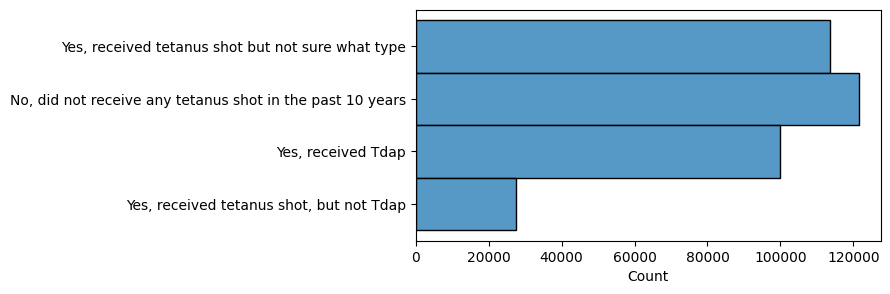

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(y=df["TetanusLast10Tdap"])
plt.ylabel("")
plt.show()

In [ ]:
#df['TetanusLast10Tdap'].fillna('Unknown', inplace=True) CONSIDERO ESTA OPCION PORQUE LOS DATOS ESTAN DISTRIBUIDOS DE UNA MANERA BASTANTE EQUILIBRADA Y PODRIA GENERAR MALA INFORMACION

<Axes: xlabel='AgeCategory'>

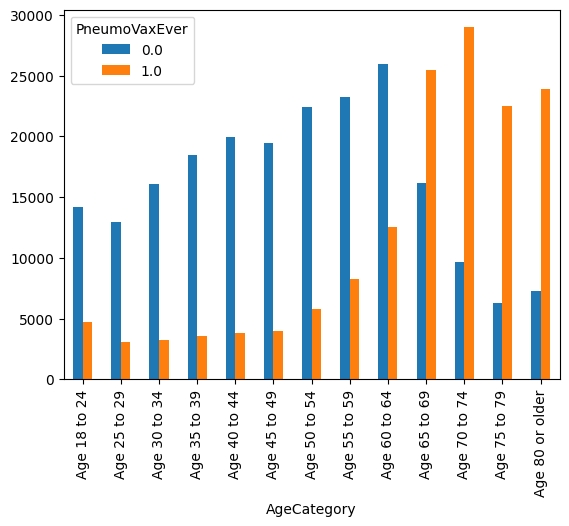

In [ ]:
df.groupby(['AgeCategory', 'PneumoVaxEver']).size().unstack().plot(kind="bar")

Podemos ver como cuanto mas adulta es la gente mas es la probabilidad que tenga la vacuna "PneumoVaxEver"

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,445132.0,0.470061,0.499103,0.000000,0.00,0.00,1.00,1.00000
PhysicalHealthDays,434205.0,4.347919,8.688912,0.000000,0.00,0.00,3.00,30.00000
MentalHealthDays,436065.0,4.382649,8.387475,0.000000,0.00,0.00,5.00,30.00000
PhysicalActivities,444039.0,0.760201,0.426961,0.000000,1.00,1.00,1.00,1.00000
SleepHours,439679.0,7.022983,1.502425,1.000000,6.00,7.00,8.00,24.00000
HadHeartAttack,442067.0,0.056797,0.231454,0.000000,0.00,0.00,0.00,1.00000
HadAngina,440727.0,0.060244,0.237938,0.000000,0.00,0.00,0.00,1.00000
HadStroke,443575.0,0.043373,0.203695,0.000000,0.00,0.00,0.00,1.00000
HadAsthma,443359.0,0.150429,0.357492,0.000000,0.00,0.00,0.00,1.00000
HadSkinCancer,441989.0,0.080285,0.271734,0.000000,0.00,0.00,0.00,1.00000


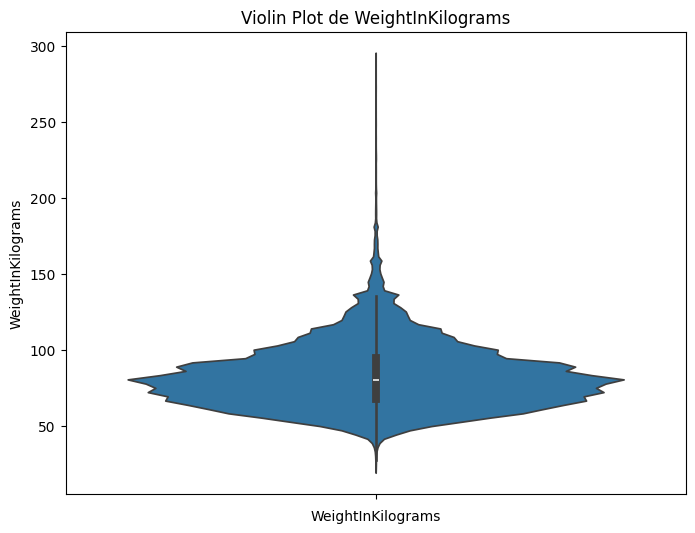

In [ ]:

plt.figure(figsize=(8, 6))
sns.violinplot(data=df["WeightInKilograms"])


plt.title("Violin Plot de WeightInKilograms")
plt.xlabel("WeightInKilograms")

plt.show()

Podemos ver que hay cierta correlacion entre la edad, y la dificultad de caminar y bañarse

In [ ]:
categorical_vars = ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
                    'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
                    'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting',
                    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap','CovidPos', 'HighRiskLastYear']
numeric_vars = ['PhysicalHealthDays', 'MentalHealthDays']

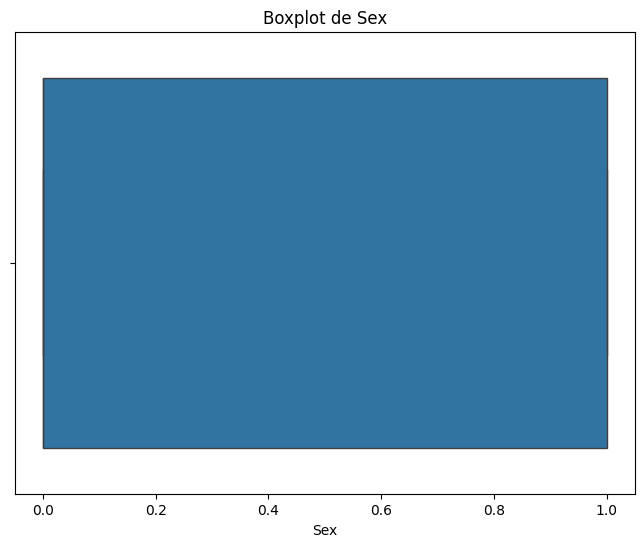

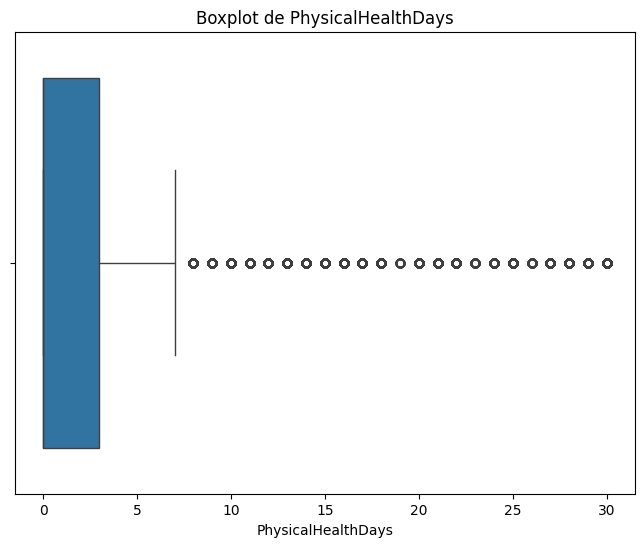

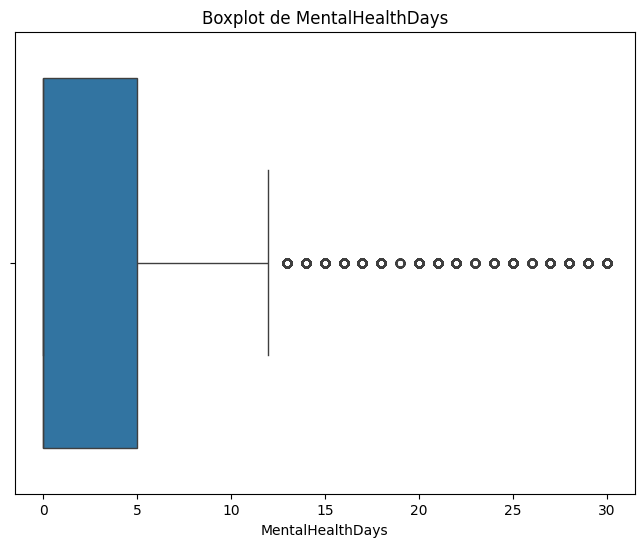

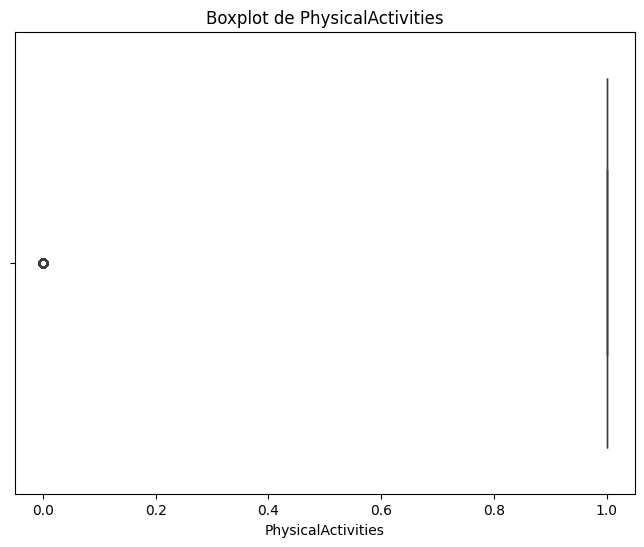

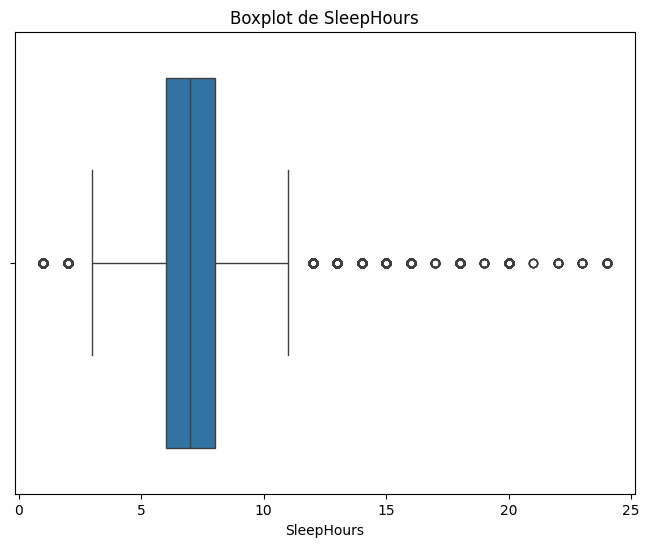

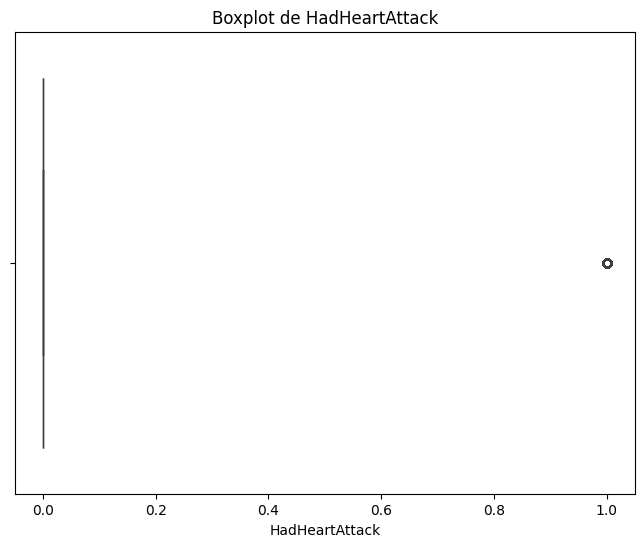

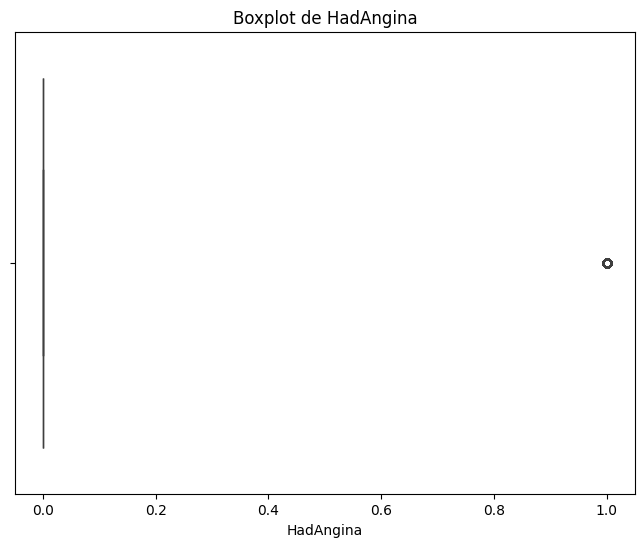

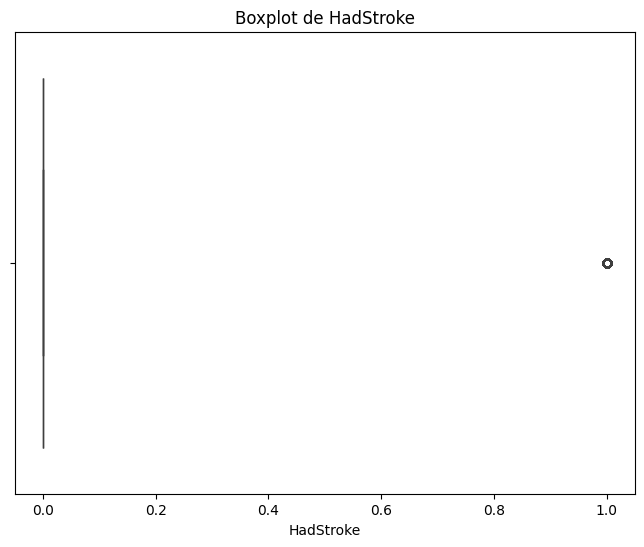

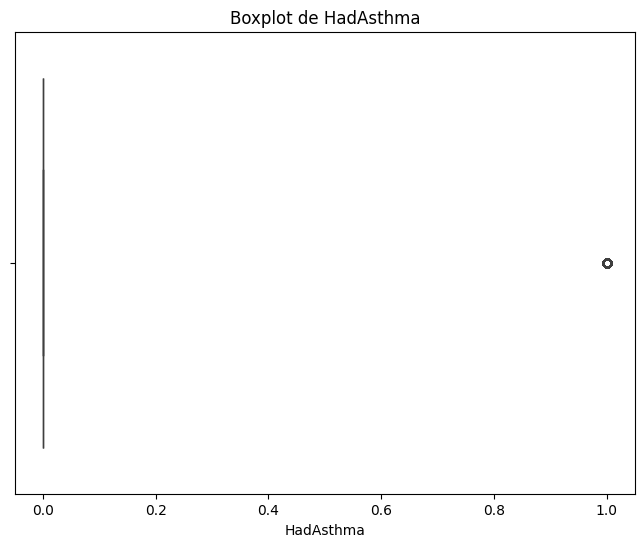

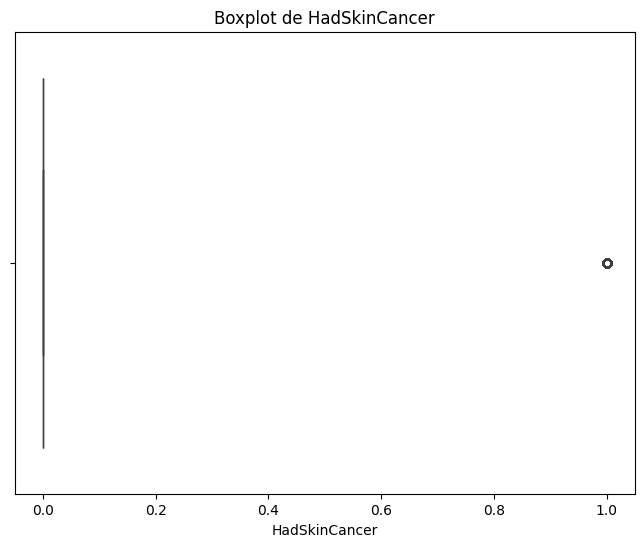

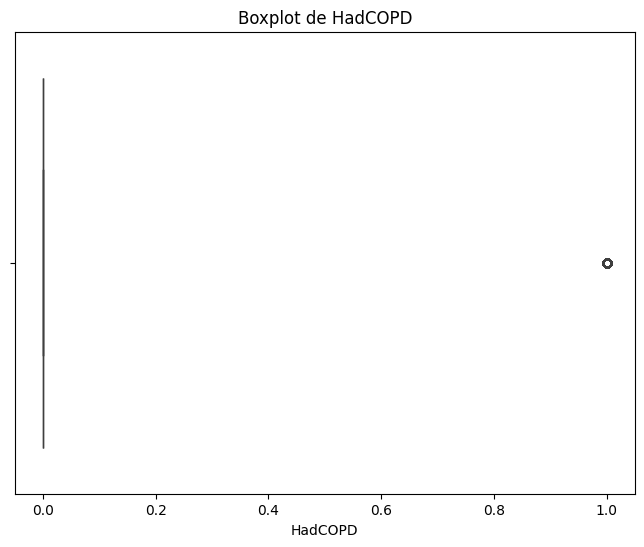

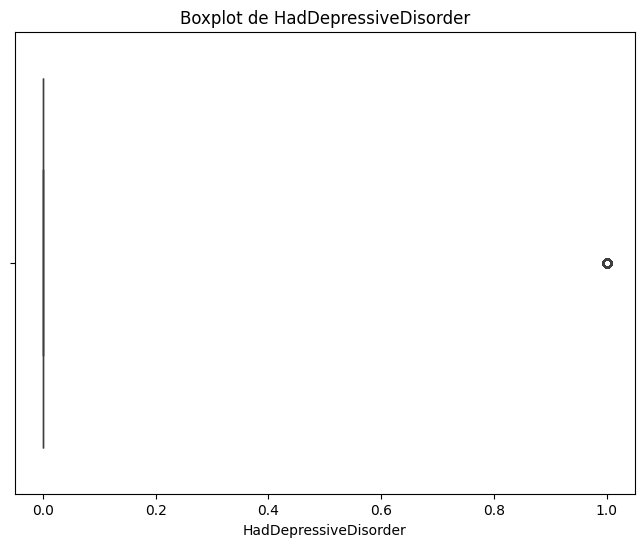

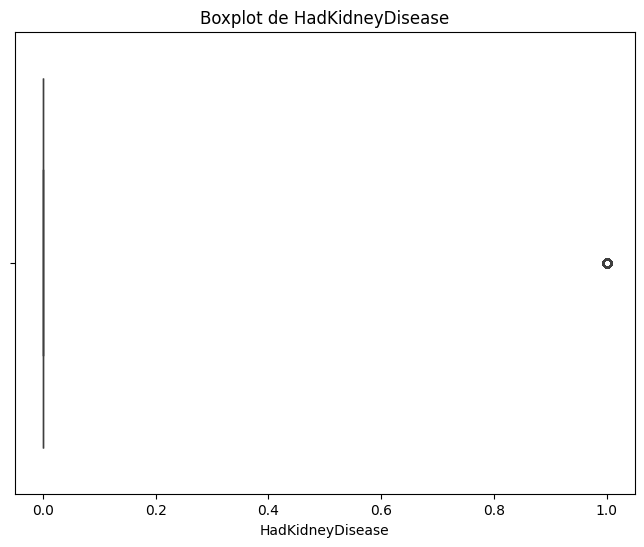

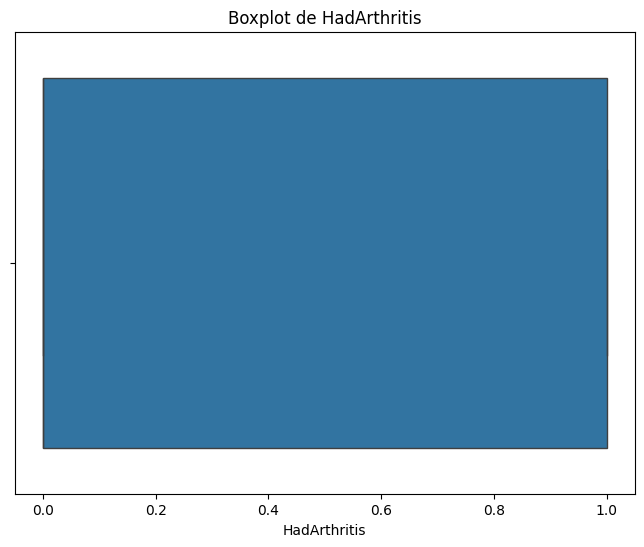

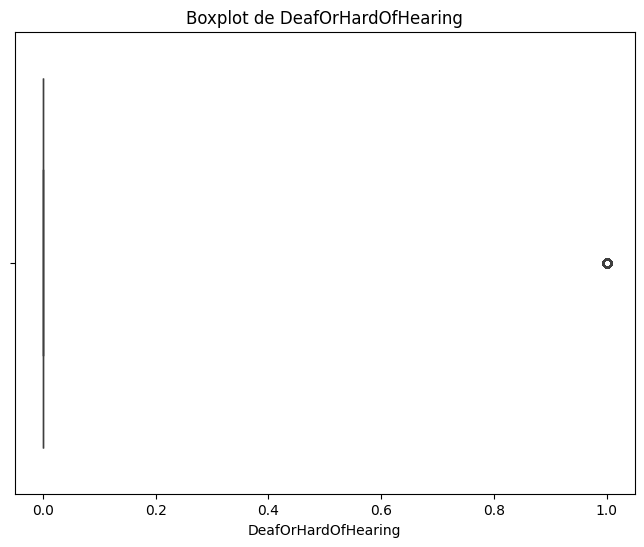

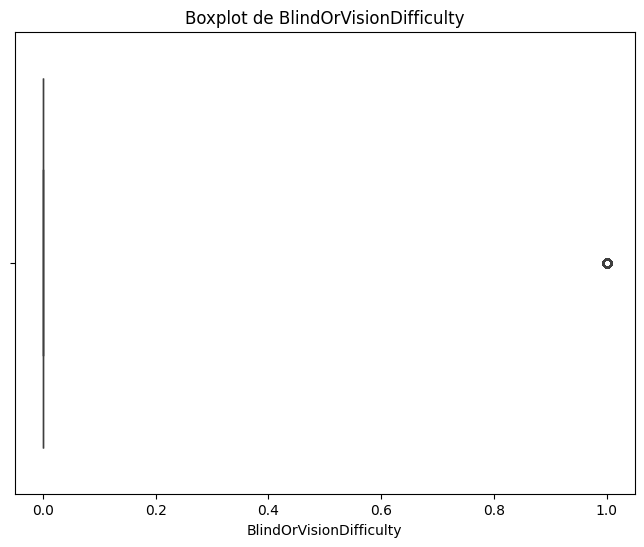

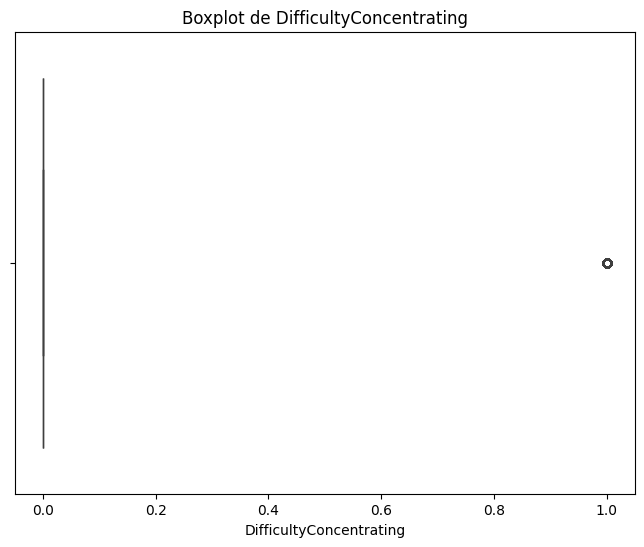

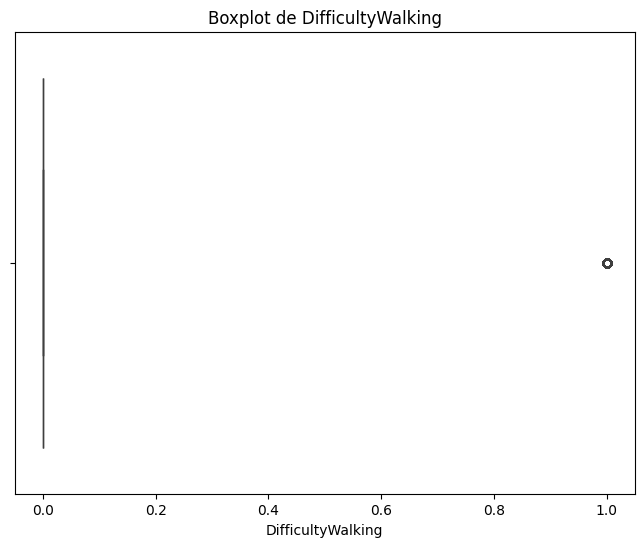

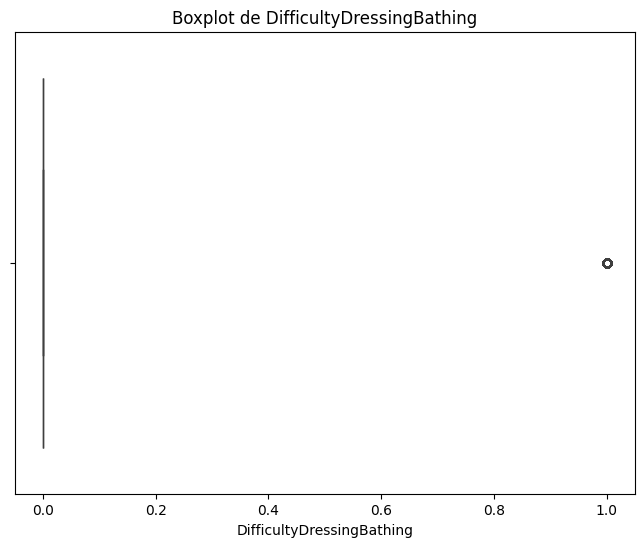

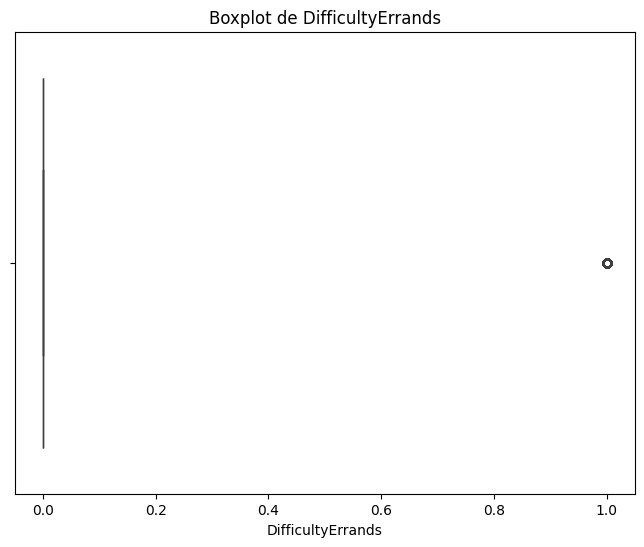

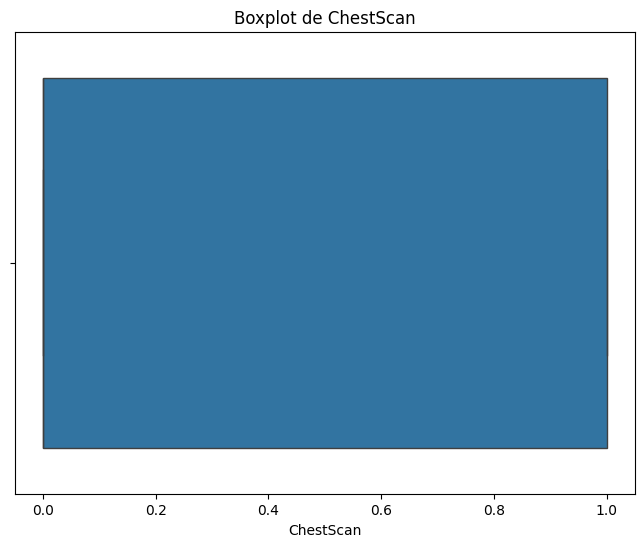

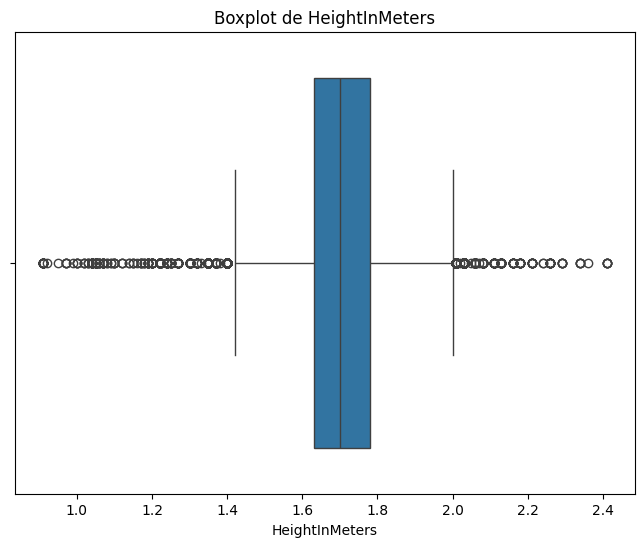

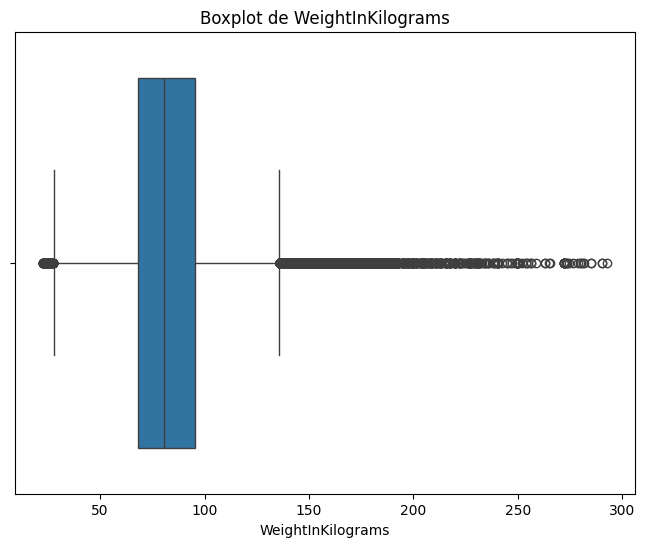

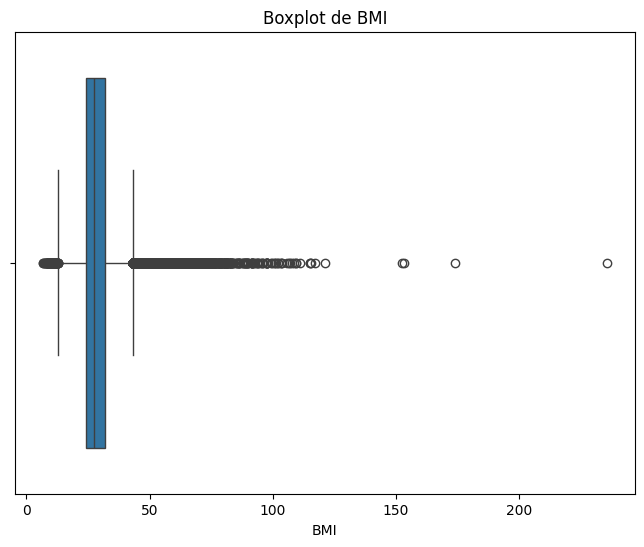

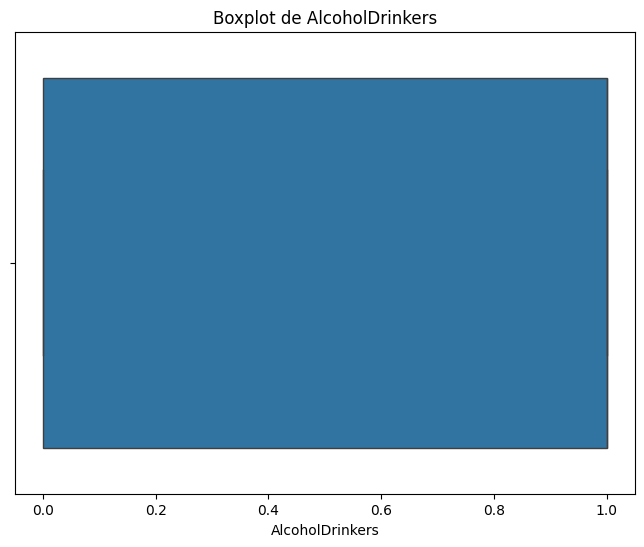

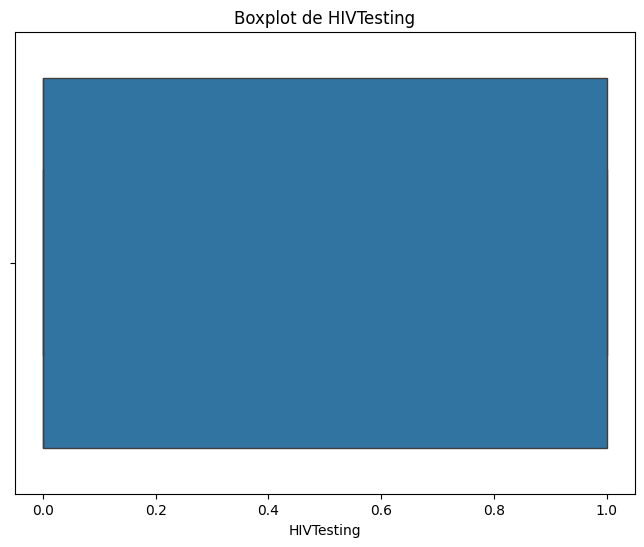

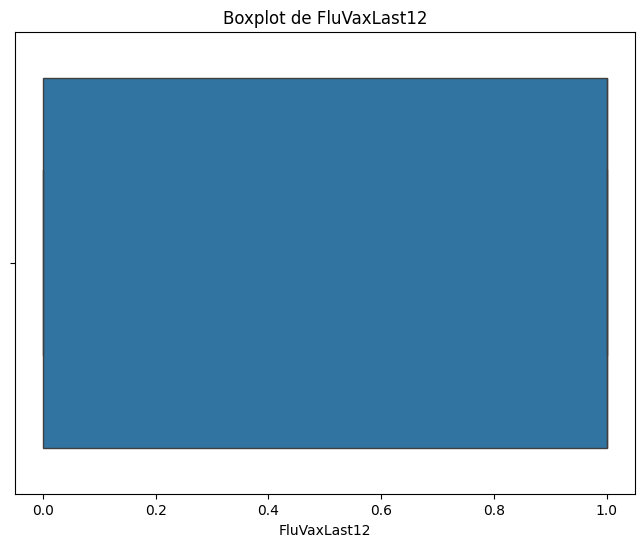

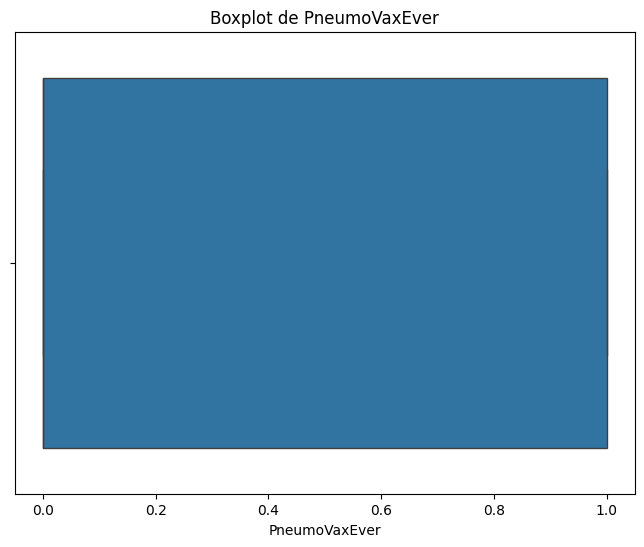

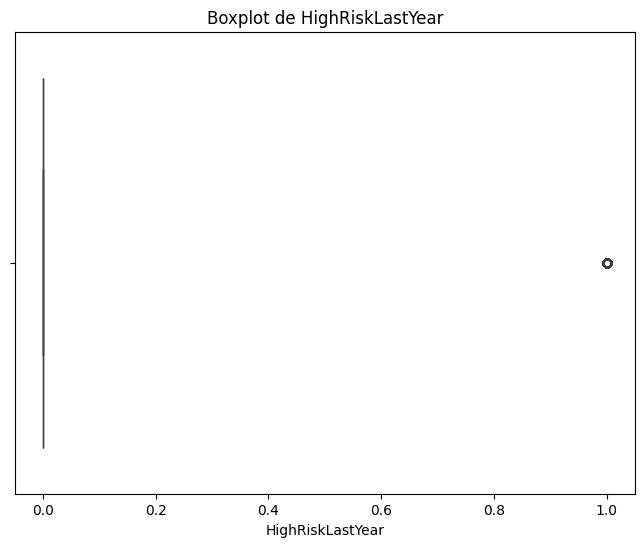

In [ ]:
for var in df.select_dtypes(exclude=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.show()

Este es un posible outlier pero tiene sentido si mide 0.91 y pesa 195 kg que tenga ese BMI

In [ ]:
df[df["BMI"] == df["BMI"].max()]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
25075,Arkansas,0,Excellent,5.0,1.0,Within past year (anytime less than 12 months ...,0.0,8.0,None of them,0.0,...,0.91,195.04,235.52711,1.0,NaN,1.0,NaN,NaN,NaN,NaN


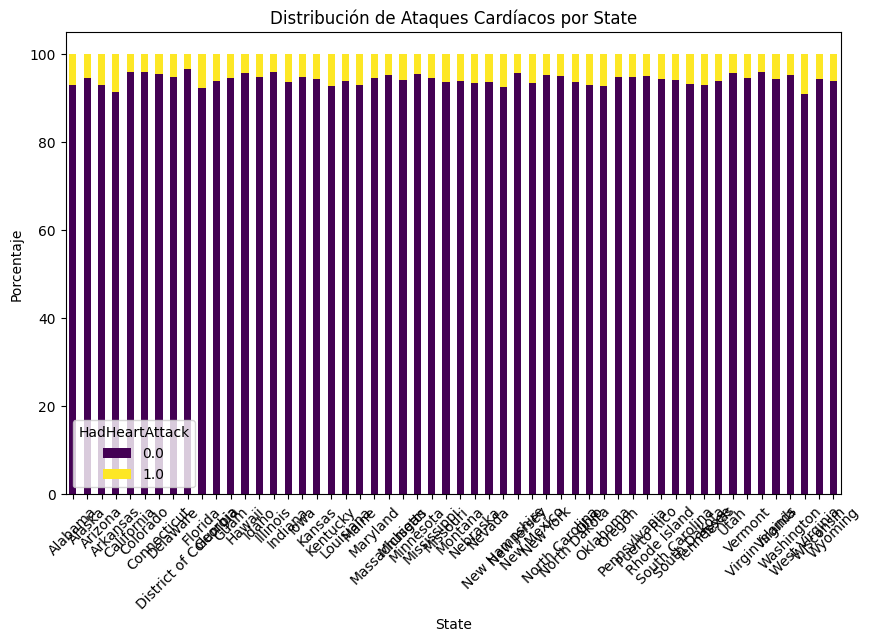

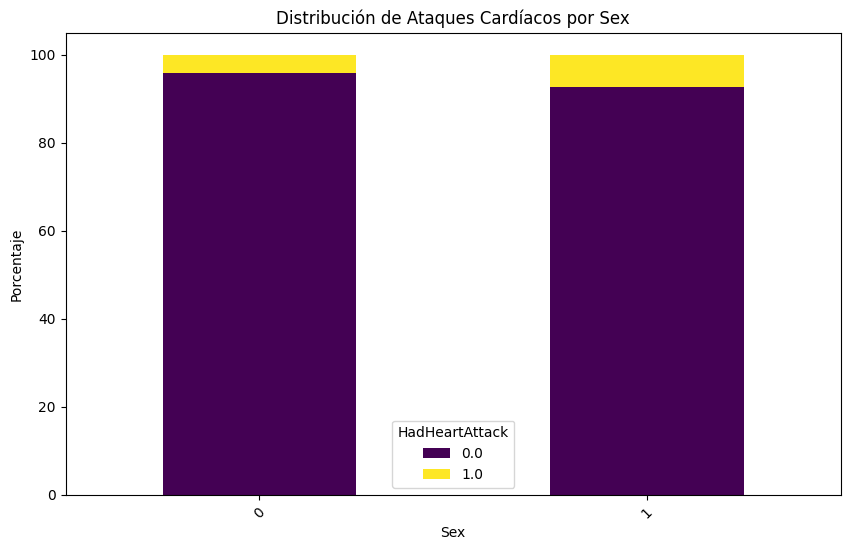

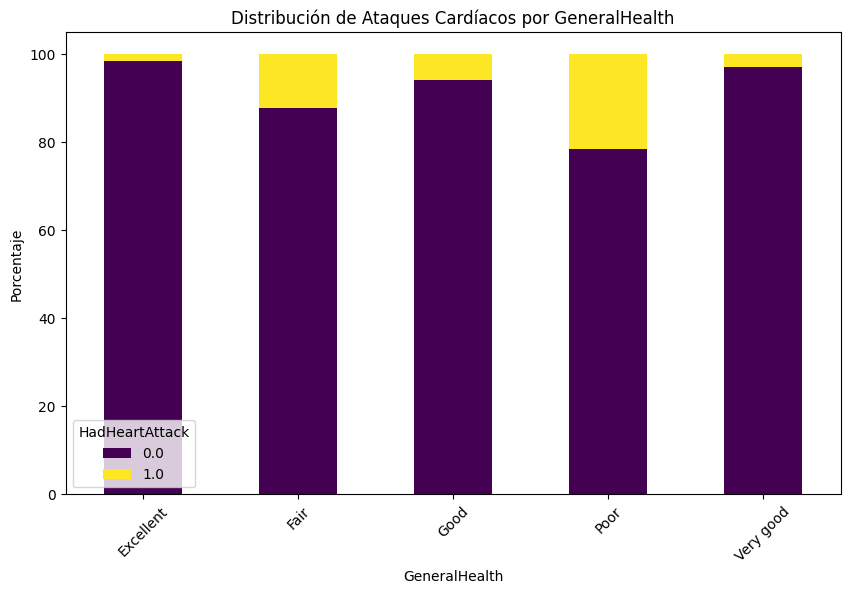

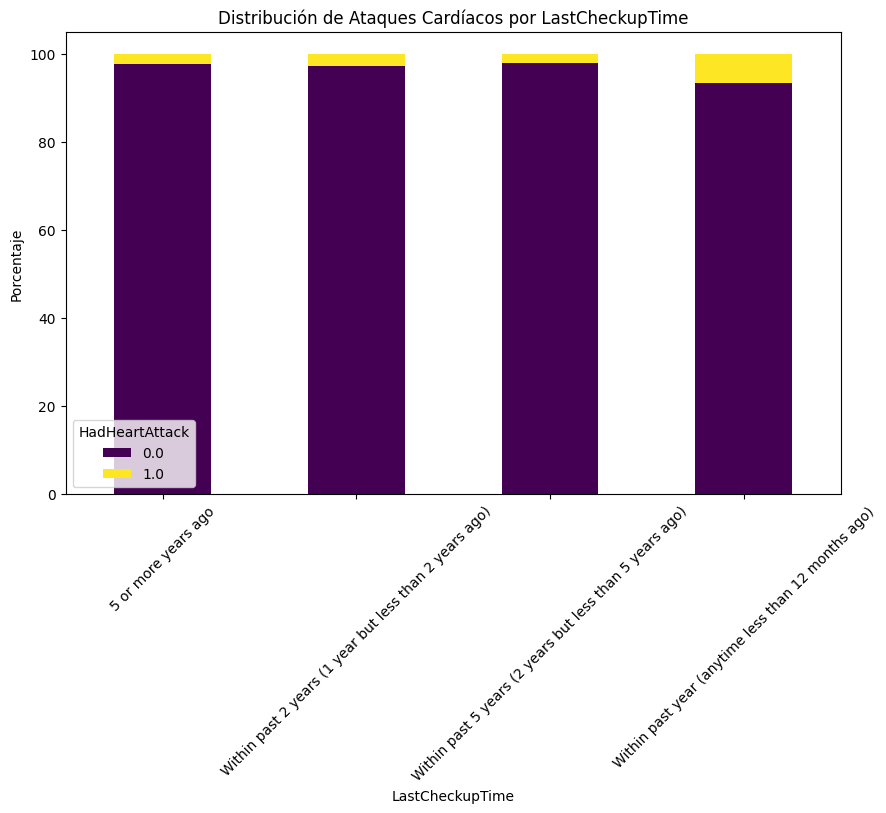

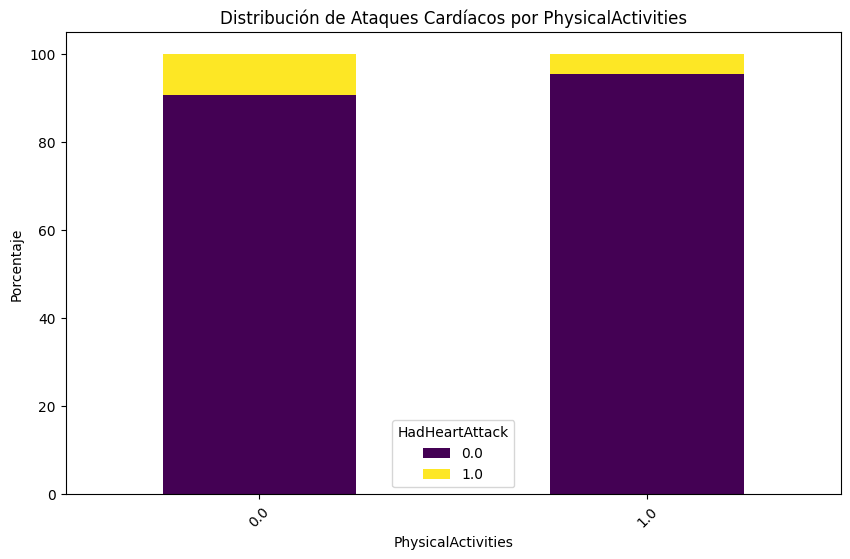

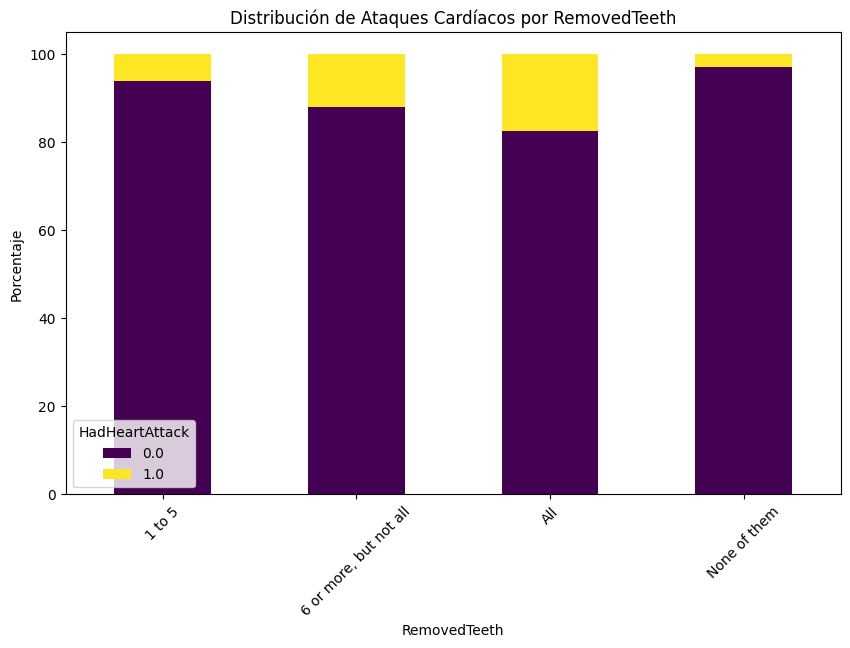

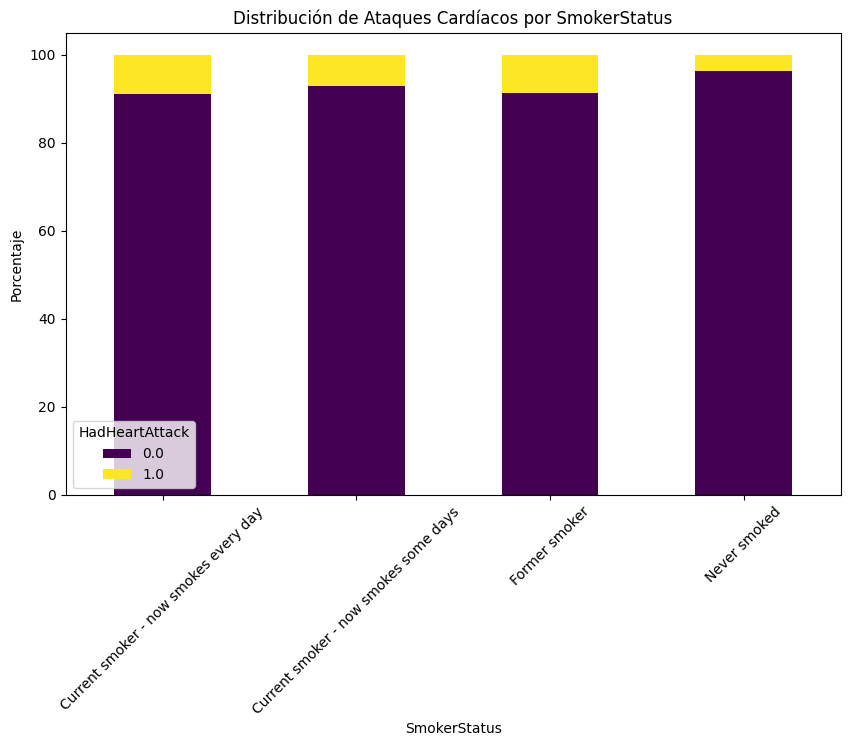

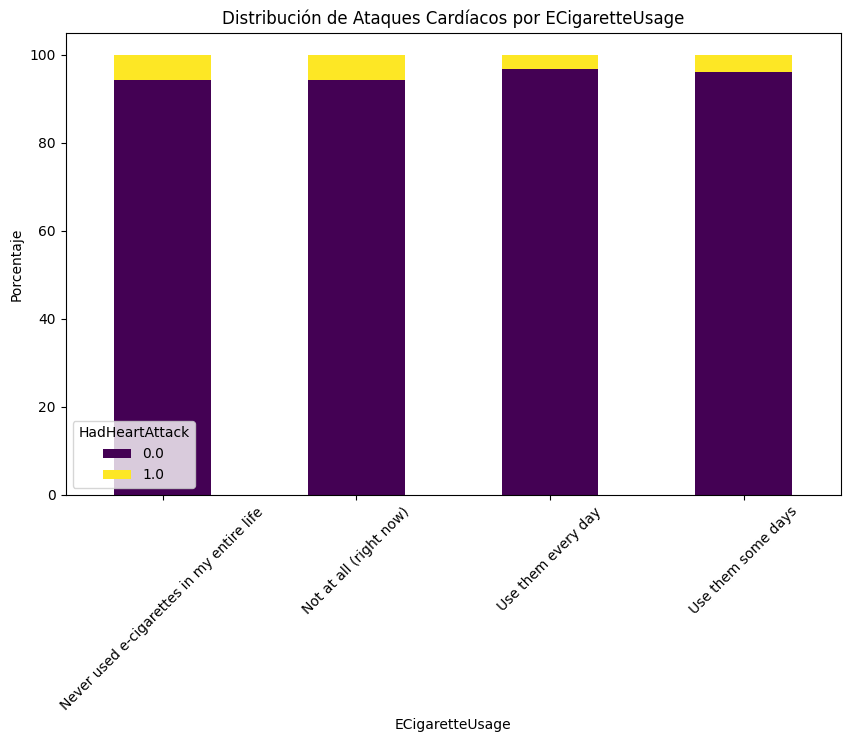

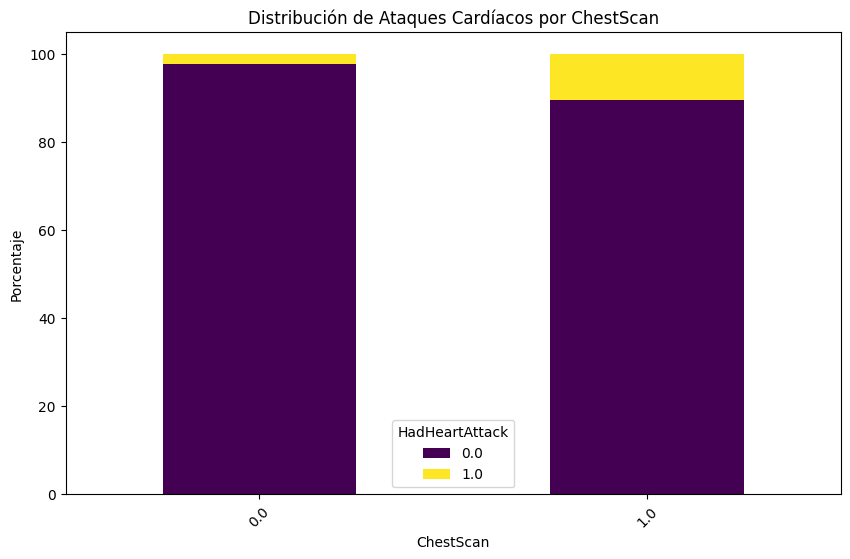

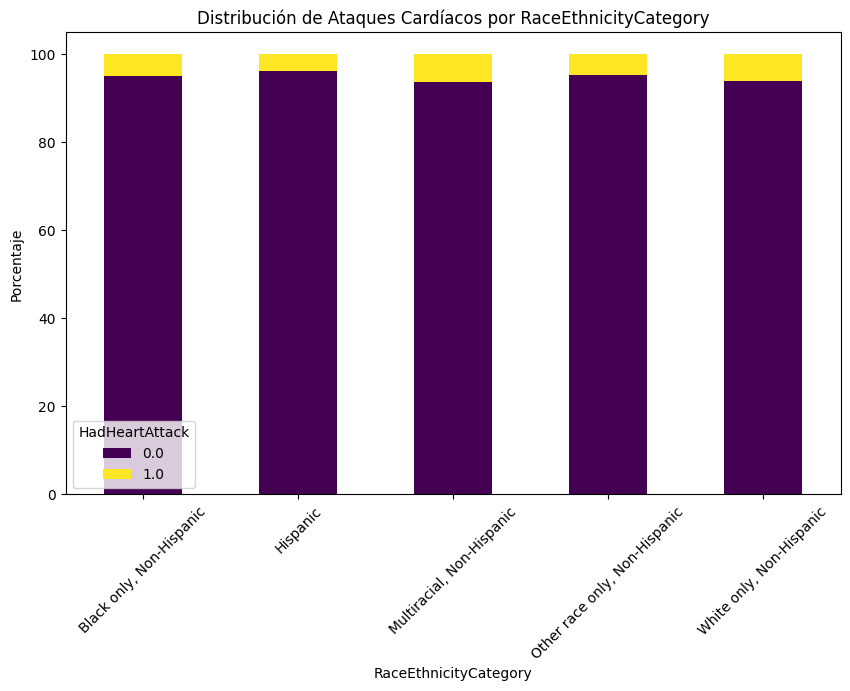

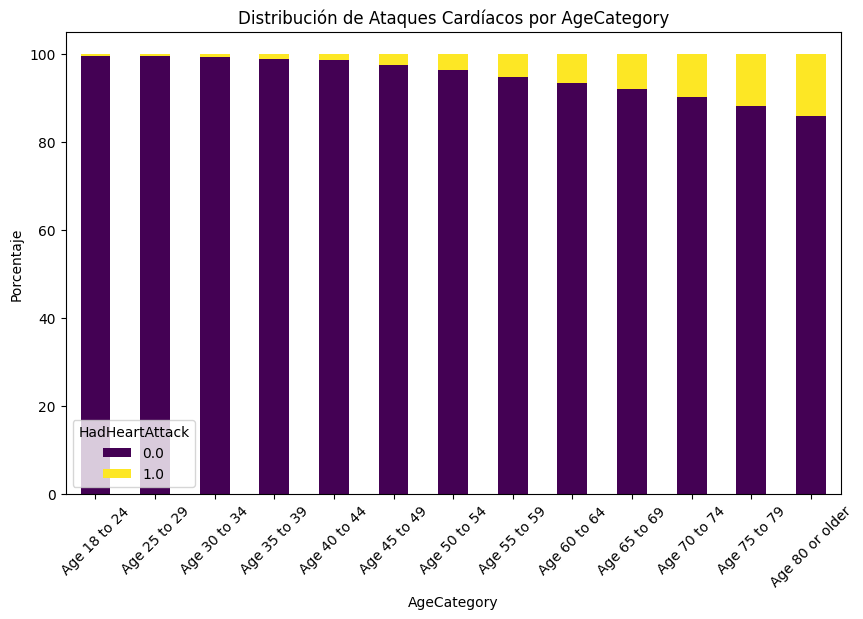

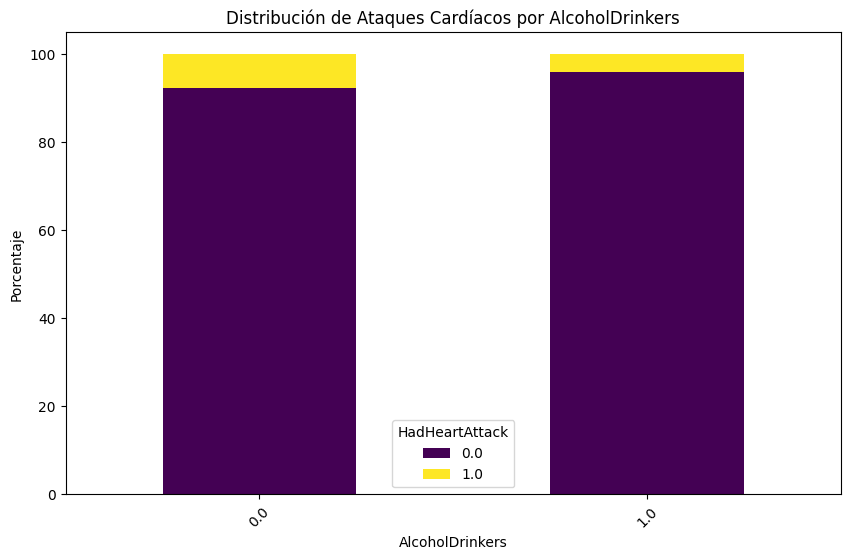

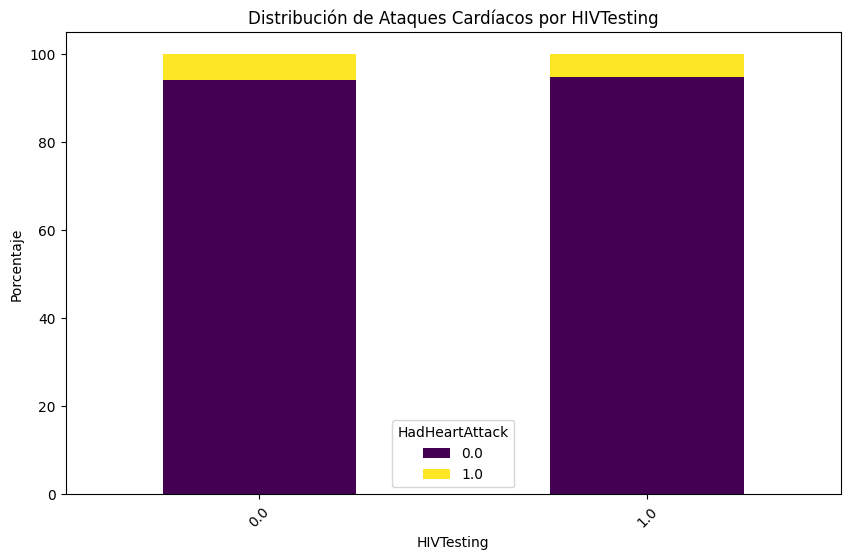

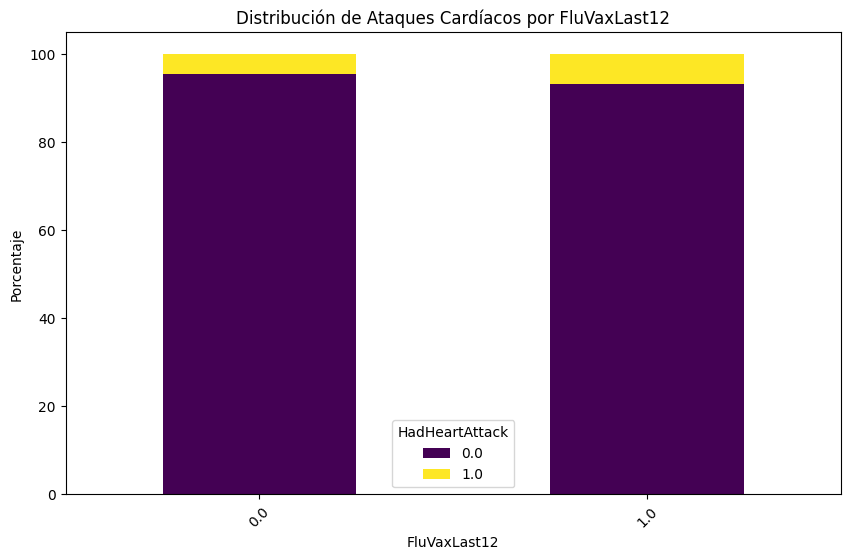

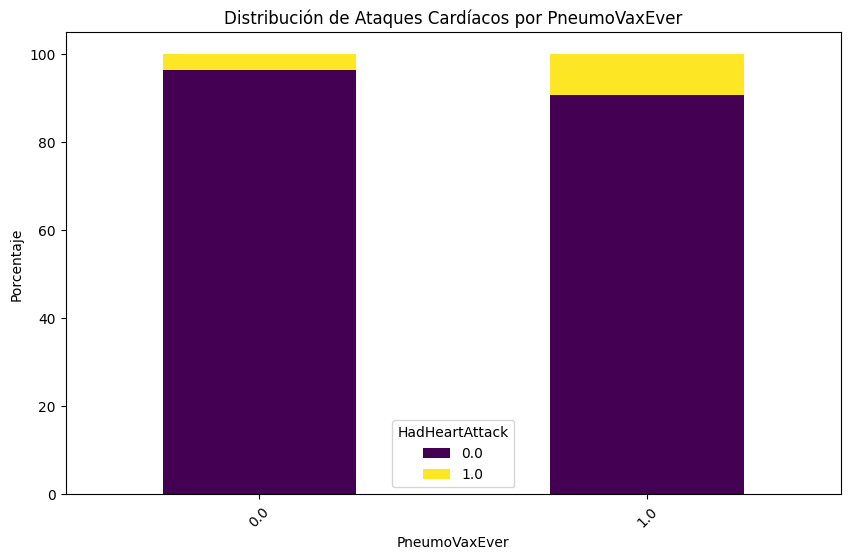

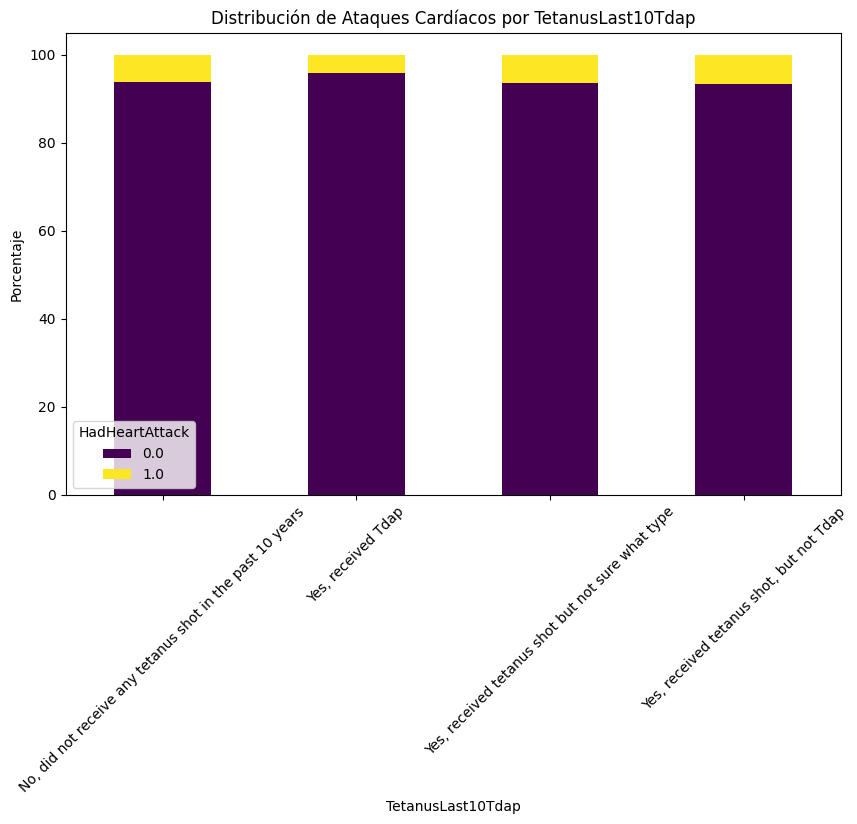

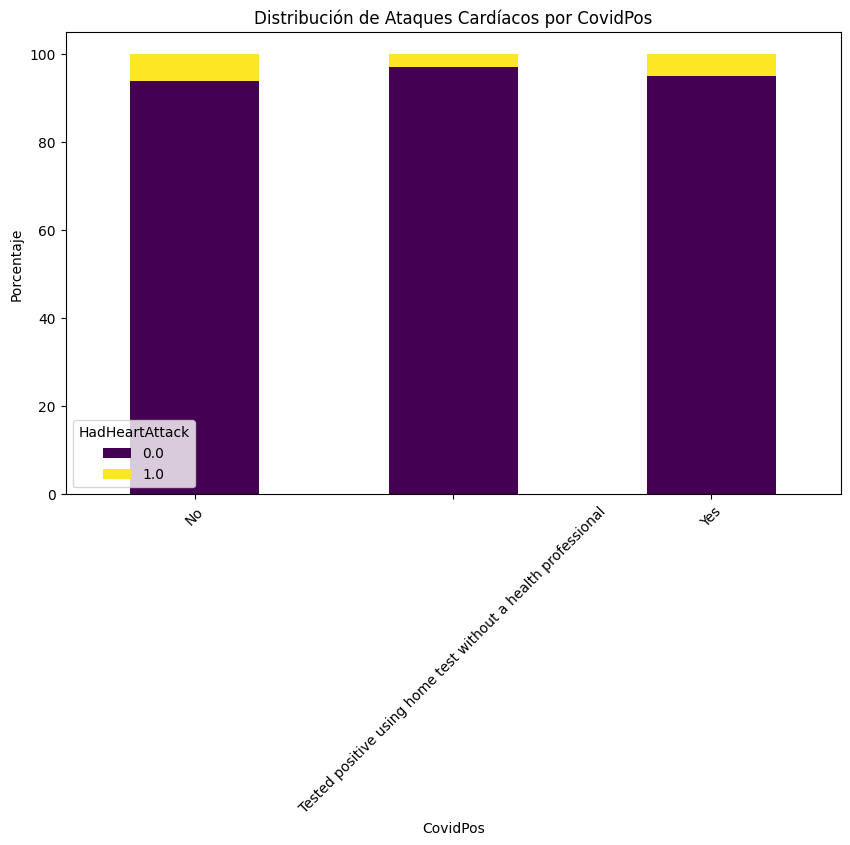

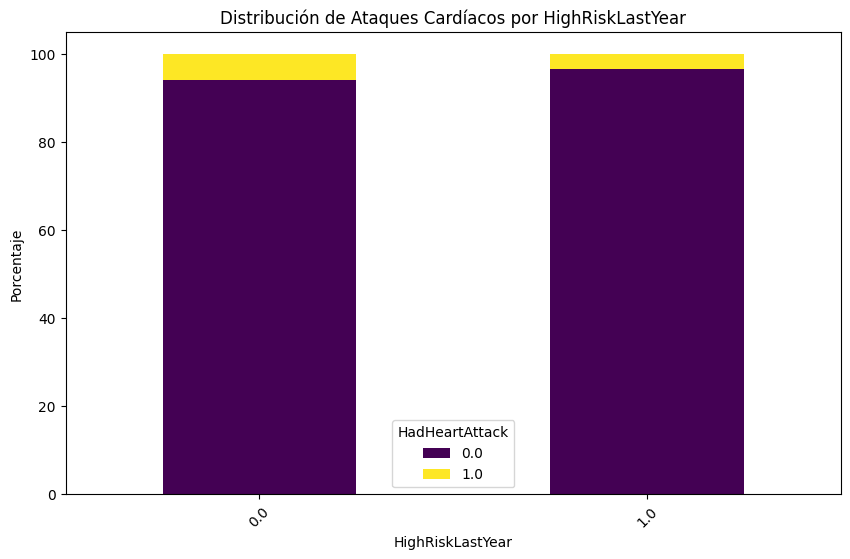

In [ ]:
# Visualización de variables categóricas con porcentajes
for var in categorical_vars:
    plot_percentage(df, var, 'HadHeartAttack')



*   Los hombres son un poco mas propensos a tener ataques del corazon
*   Cuando la salud es exelente casi nunca ocurren ataques del corazon, pero cuando la salud es mala hay casi un 20% de casos
*   A medida que tiene mas problemas dentales mas es la probabilidad de ataques al corazon, cuando no se quito ningun diente la ocurrencia de ataques es del 3% y cuando se saco todos los dientes es del 20%
*   La gente que fuma es mucho menos propensa a sufrir ataques del corazon(con los cigarros electronicos no sucede eso)
*   Todas las razas etnicas tienen una distribucion similar
*   La edad tiene una muy notable tendencia que cuando mayor es la persona mas es la ocurrencia de problemas al corazon







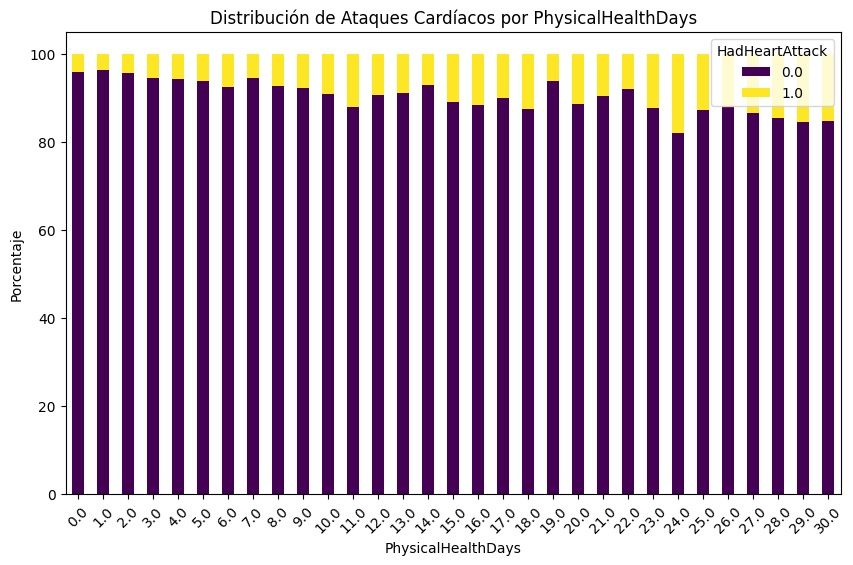

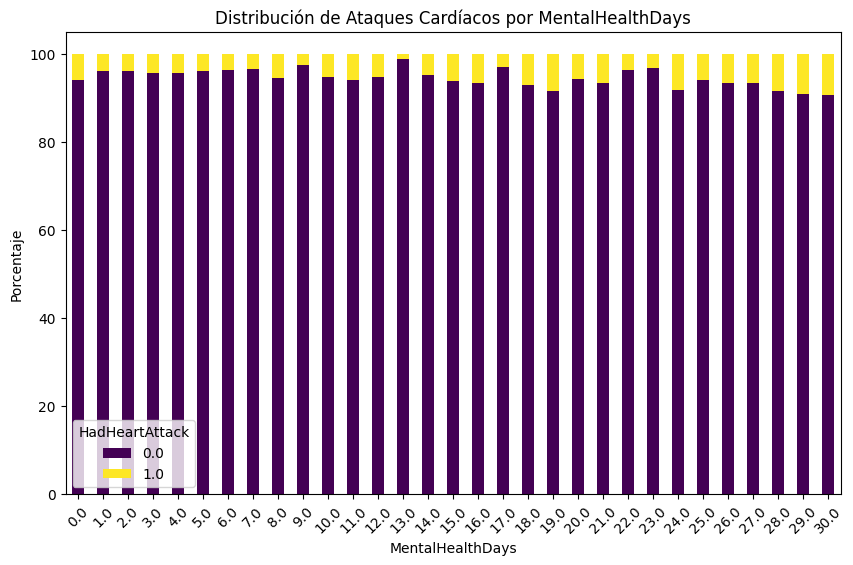

In [ ]:
for var in numeric_vars:
    plot_percentage(df, var, 'HadHeartAttack')

Cuantos mas dias psicologicos tiene mas probabilidades hay

In [ ]:
df[df["DifficultyDressingBathing"] == 1][["AgeCategory","DifficultyWalking", "DifficultyDressingBathing"]]

,AgeCategory,DifficultyWalking,DifficultyDressingBathing
41,Age 80 or older,1.0,1.0
55,Age 65 to 69,1.0,1.0
96,Age 80 or older,1.0,1.0
118,Age 80 or older,1.0,1.0
119,Age 80 or older,1.0,1.0
...,...,...,...
444922,Age 45 to 49,1.0,1.0
444942,Age 65 to 69,1.0,1.0
444958,Age 60 to 64,1.0,1.0
444970,Age 65 to 69,1.0,1.0


In [ ]:
"""
columns_to_analyze = df.columns.tolist()

# Configurar el tamaño de la figura y el grid de subplots
n_cols = 5  # Número de columnas en el grid
n_rows = 8  # Número de filas en el grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada columna y crear el gráfico correspondiente
for i, column in enumerate(columns_to_analyze):
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette="viridis", ax=axes[i])
    axes[i].set_title(f'Distribución de valores en {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()
"""

'\ncolumns_to_analyze = df.columns.tolist()\n\n# Configurar el tamaño de la figura y el grid de subplots\nn_cols = 5  # Número de columnas en el grid\nn_rows = 8  # Número de filas en el grid\n\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))\n\n# Aplanar el array de ejes para iterar fácilmente\naxes = axes.flatten()\n\n# Iterar sobre cada columna y crear el gráfico correspondiente\nfor i, column in enumerate(columns_to_analyze):\n    value_counts = df[column].value_counts()\n    sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette="viridis", ax=axes[i])\n    axes[i].set_title(f\'Distribución de valores en {column}\')\n    axes[i].set_xlabel(column)\n\nplt.tight_layout()\nplt.show()\n'

In [ ]:
#profile = pandas_profiling.ProfileReport(df)
#profile

No considere ningun valor de los visualizados como outliers, puede ser que el dataset ya tenga un preprocesado.

# Imputacion datos faltantes

Completamos con la correlacion de PneumoVaxEver y los que nos quedan sin poder imputar los llenamos con la mediana

In [ ]:
moda_age_by_pneumo = df.groupby('PneumoVaxEver')['AgeCategory'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Función para imputar valores nulos en AgeCategory
def imputar_age_category(row, moda_age):
    if pd.isnull(row['AgeCategory']) and pd.notnull(row['PneumoVaxEver']):
        row['AgeCategory'] = moda_age.get(row['PneumoVaxEver'], row['AgeCategory'])
    return row

# Aplicar la función a cada fila del DataFrame
df = df.apply(lambda row: imputar_age_category(row, moda_age_by_pneumo), axis=1)

#Por si nos quedo alguna fila sin poder completar
df["AgeCategory"] = df["AgeCategory"].fillna(df["AgeCategory"].mode()[0])

<Axes: >

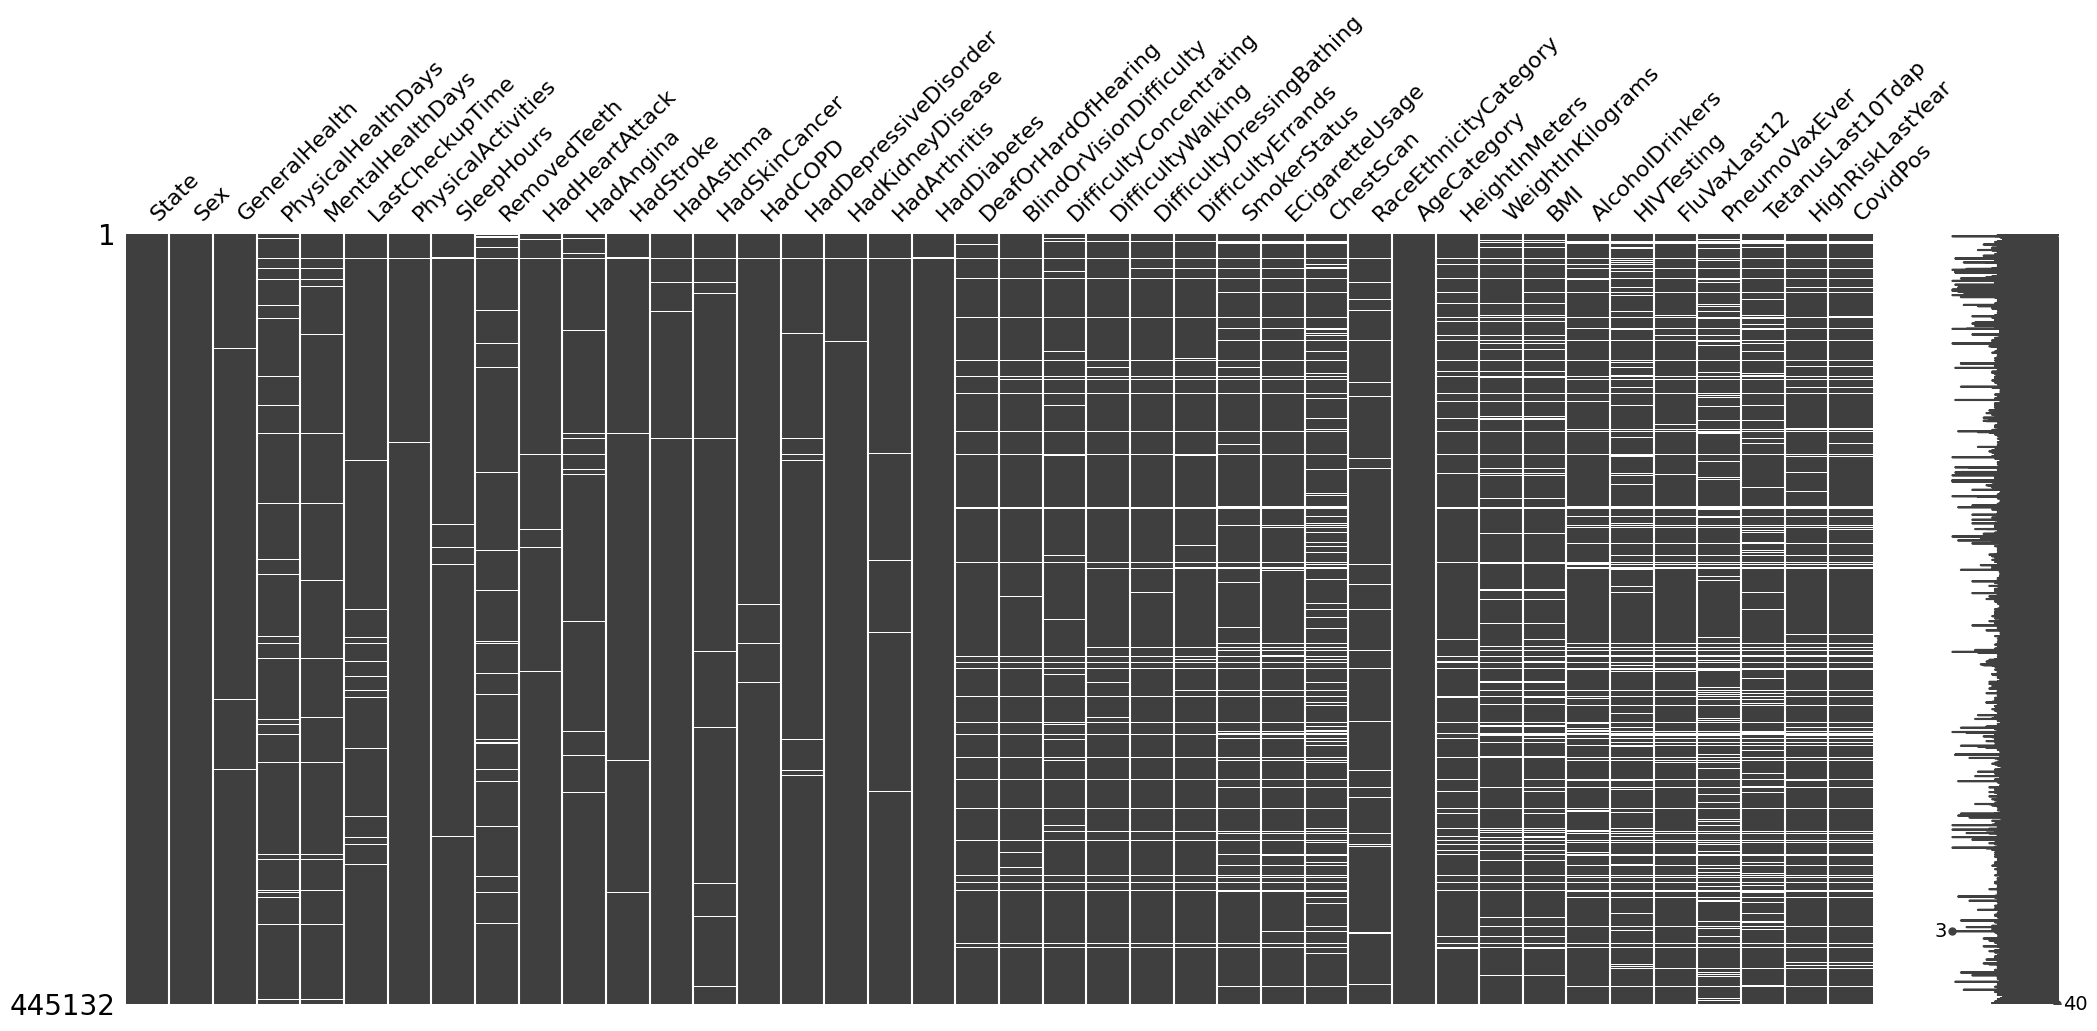

In [ ]:
msno.matrix(df)

El grupo de edad inlfuye signficativamente en si tiene dificultades para caminar o para vestirse

In [ ]:
# Calcular la moda de DifficultyWalking y DifficultyDressingBathing para cada grupo de edad
moda_walk_by_age = df.groupby('AgeCategory')['DifficultyWalking'].apply(lambda x: x.mode()[0])
moda_bath_by_age = df.groupby('AgeCategory')['DifficultyDressingBathing'].apply(lambda x: x.mode()[0])

# Imputar los valores nulos en DifficultyWalking y DifficultyDressingBathing basándose en la edad
df['DifficultyWalking'] = df.apply(lambda row: moda_walk_by_age[row['AgeCategory']] if pd.isnull(row['DifficultyWalking']) else row['DifficultyWalking'], axis=1)
df['DifficultyDressingBathing'] = df.apply(lambda row: moda_bath_by_age[row['AgeCategory']] if pd.isnull(row['DifficultyDressingBathing']) else row['DifficultyDressingBathing'], axis=1)


Como vimos antes "SleepHours" tenia la media muy cerca de la mediana

In [ ]:
df["SleepHours"].fillna(df["SleepHours"].median(), inplace=True)

Considero una buena opcion eliminar los valores, ya que es la columna que quiero predecir y solo tenia 0.7% de valores nulos

In [ ]:
df["HadHeartAttack"].dropna(inplace=True)

Tomo la decision de crear un nuevo valor "Unknown" debido a que tiene 4 valores y su distribucion es equilibrada y esta columna tenia 18% y me iba a generar un desequilibro en un valor

In [ ]:
df['TetanusLast10Tdap'].fillna('Unknown', inplace=True)

Potenciales a completar con la mediana porque tienen un gran sesgo y no tienen ninguna relacion

In [ ]:
columnas_sesgadas_sin_relacion = ['DeafOrHardOfHearing', 'BlindOrVisionDifficulty']

columna object con pocos nulos, inserto por la MODA

In [ ]:
df["RemovedTeeth"].fillna(df["RemovedTeeth"].mode()[0], inplace=True)

2.5% es un porcentaje bajo y manejable. Decido utilizar una tecnica simple de imputacion (MODA)

In [ ]:
for col in df.columns:
  if (get_null_percentage(df[col]) <= 2.5):
    df[col].fillna(df[col].mode()[0], inplace=True)


Completamos PneumoVaxEver con AgeCategory, ya que tienen una correlacion alta

In [ ]:
# Calcula la moda de 'PneumoVaxEver' para cada grupo de 'AgeCategory'
df_age_pneumo_moda = df.groupby('AgeCategory')['PneumoVaxEver'].apply(lambda x: x.mode().iloc[0])

# Llena los valores faltantes en 'PneumoVaxEver' utilizando la moda correspondiente de 'AgeCategory'
df['PneumoVaxEver'] = df['PneumoVaxEver'].fillna(df['AgeCategory'].map(df_age_pneumo_moda))

Cuando BMI, Weight Y Height son nulos completo los 3 con la moda, sino los trato de completar con alguna columna que este correlacionada

In [ ]:
moda_bmi = df["BMI"].mode()[0]
moda_weight = df["WeightInKilograms"].mode()[0]
moda_height = df["HeightInMeters"].mode()[0]

# Aplicar la función a cada elemento de las columnas seleccionadas del DataFrame
df[["BMI", "WeightInKilograms", "HeightInMeters"]] = df[["BMI", "WeightInKilograms", "HeightInMeters"]].apply(lambda x: tres_val_null(x, moda_bmi, moda_weight, moda_height), axis=1)

Como dependiendo el sexo cambia la altura por su correlacion, decidi completar la Altura("HeightInMeters") por la moda dependiendo su sexo

In [ ]:

df_sex_height_moda = df.groupby('Sex')['HeightInMeters'].apply(lambda x: x.mode().iloc[0])
df_sex_height_moda

df['HeightInMeters'] = df['HeightInMeters'].fillna(df['Sex'].map(df_sex_height_moda))


Como ChetScan y HIVTesting son booleanos y tienen una cantidad similar de valores 1 y 0, si imputo por la moda se desvalanceara mucho. Creo que imputar por AgeCategory que tiene 0.287 de correlacion con chestScan y 0.3 con HIVTesting

In [ ]:
# Calcula la moda de chestscan y HIVTesting para cada grupo de AgeCategory
moda_chestscan_by_age = df.groupby('AgeCategory')['ChestScan'].apply(lambda x: x.mode()[0])
moda_HIVTesting_by_age = df.groupby('AgeCategory')['HIVTesting'].apply(lambda x: x.mode()[0])

# Imputa los valores faltantes en chestScan y HIVTesting basados en la AgeCategory correspondiente
df['HIVTesting'] = df.apply(lambda row: moda_HIVTesting_by_age[row['AgeCategory']] if pd.isnull(row['HIVTesting']) else row['HIVTesting'], axis=1)
df['ChestScan'] = df.apply(lambda row: moda_chestscan_by_age[row['AgeCategory']] if pd.isnull(row['ChestScan']) else row['ChestScan'], axis=1)

Imputo por la MODA debido a que las columnas están muy desbalanceadas desbalanceadas y son booleanas.

SmokerStatus son categoricos y tienen varios datos distintos pero con valores no muy diferentes y considero que imputar por moda no es una buena opcion

ECigaretteUsage es categorico pero hay un tipo de dato que es claramente mayot, por eso imputo por la moda

FluVaxLast12 Y AlcoholDrinkers yo creo que se puede imputar de una manera mejor, pero no me quedo tiempo para revisarlo bien

In [ ]:
columns_to_impute = {
    "DeafOrHardOfHearing": df["DeafOrHardOfHearing"].mode()[0],
    "BlindOrVisionDifficulty": df["BlindOrVisionDifficulty"].mode()[0],
    "HighRiskLastYear": df["HighRiskLastYear"].mode()[0],
    "WeightInKilograms": df["WeightInKilograms"].mode()[0],
    "BMI": df["BMI"].mode()[0],
    "DifficultyConcentrating" : df["DifficultyConcentrating"].mode()[0],
    "DifficultyErrands" : df["DifficultyErrands"].mode()[0],
    "SmokerStatus" : "Unknown",
    "ECigaretteUsage" : df["ECigaretteUsage"].mode()[0],
    "RaceEthnicityCategory" : df["RaceEthnicityCategory"].mode()[0],
    "CovidPos" : df["CovidPos"].mode()[0],
    "AlcoholDrinkers" : df["AlcoholDrinkers"].mode()[0],
    "FluVaxLast12" : df["FluVaxLast12"].mode()[0]
}


# Iterar sobre las columnas y llenar los valores nulos con sus respectivas modas
for column, mode_value in columns_to_impute.items():
    df[column] = df[column].fillna(mode_value)

<Axes: >

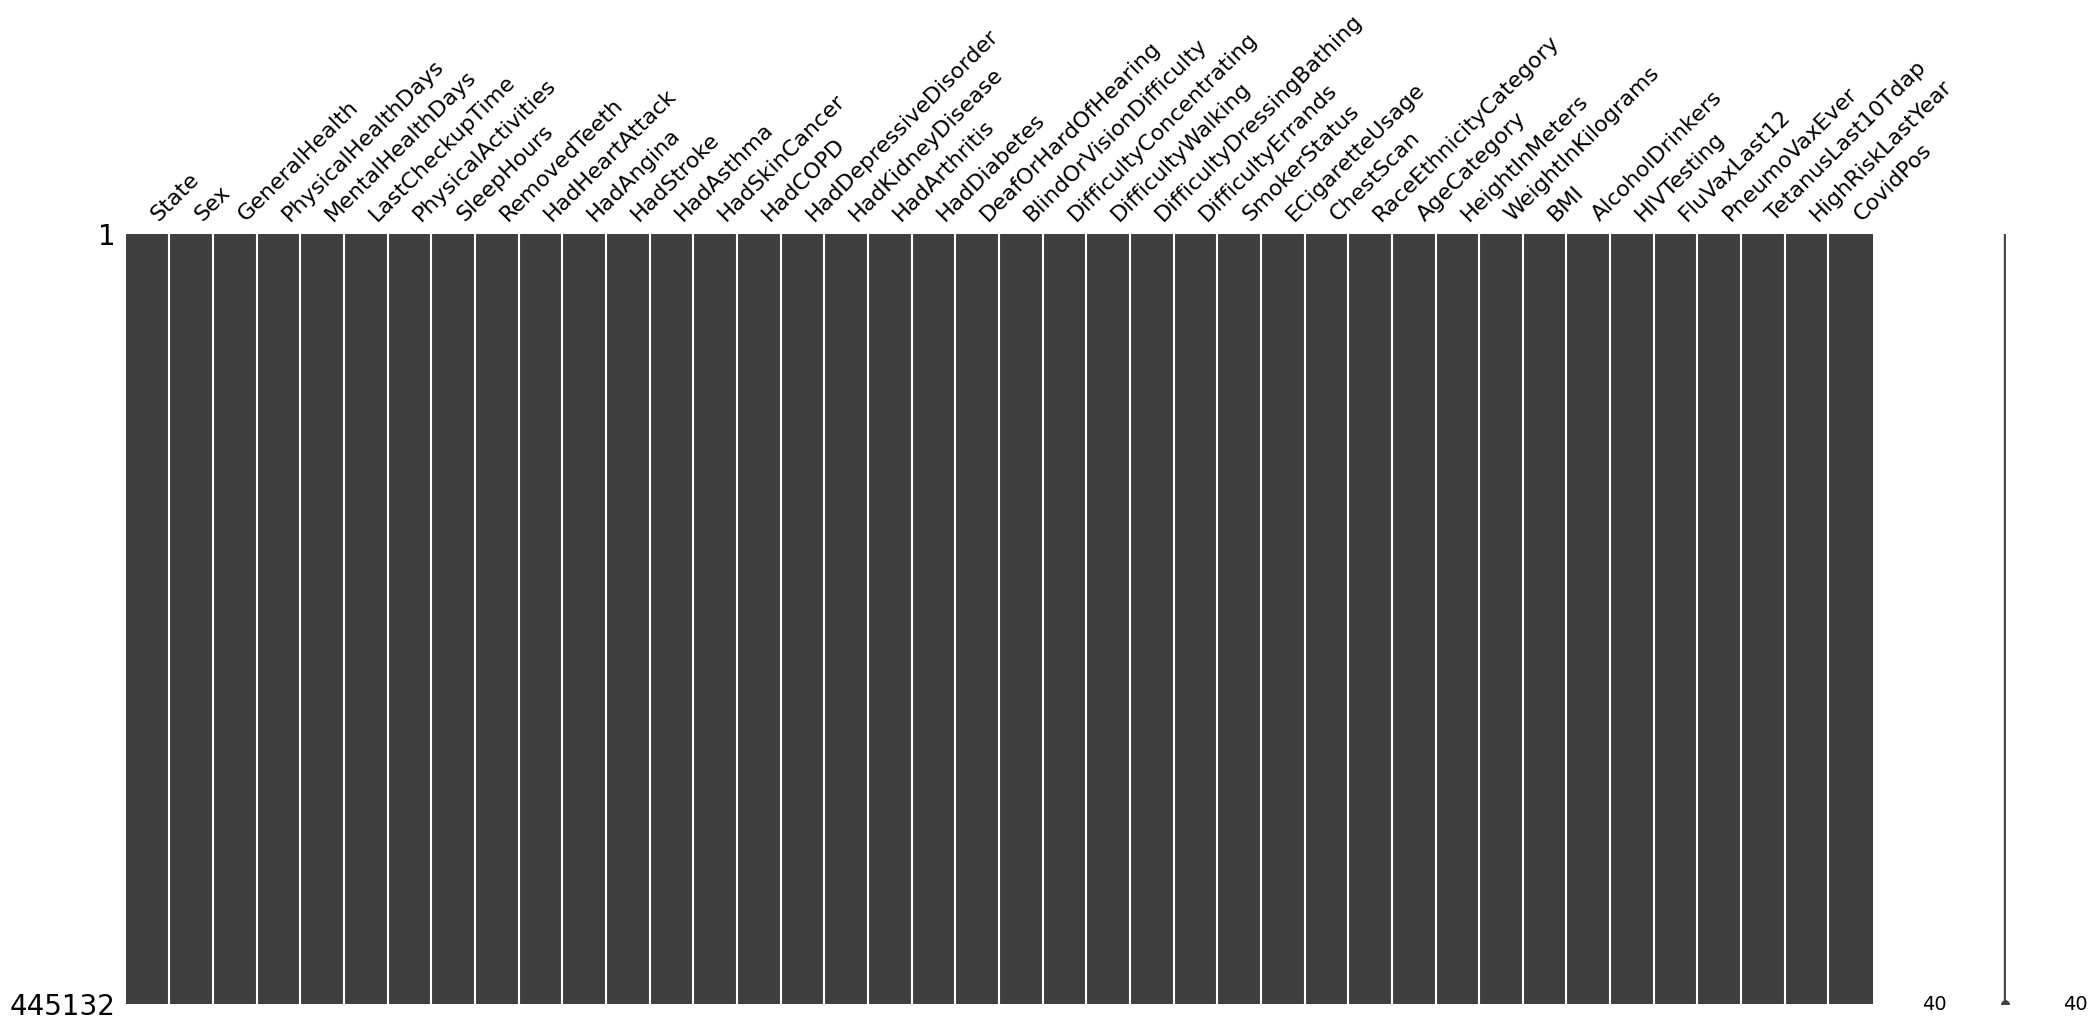

In [ ]:
msno.matrix(df)

# Manejo columnas

In [ ]:
columnas_categoricas = df.select_dtypes(include=['object']).columns

In [ ]:
for col in columnas_categoricas:
  cant_valores = df[col].value_counts().count()
  print(f"{col} -----> {cant_valores} columnas distintas")


State -----> 54 columnas distintas
GeneralHealth -----> 5 columnas distintas
LastCheckupTime -----> 4 columnas distintas
RemovedTeeth -----> 4 columnas distintas
HadDiabetes -----> 4 columnas distintas
SmokerStatus -----> 5 columnas distintas
ECigaretteUsage -----> 4 columnas distintas
RaceEthnicityCategory -----> 5 columnas distintas
AgeCategory -----> 13 columnas distintas
TetanusLast10Tdap -----> 5 columnas distintas
CovidPos -----> 3 columnas distintas


**State** voy a usar **LabelEncoding** debido a la cantidad de tipo de datos distinto que hay en la columna

**ageCategory**, **GeneralHealt** y **RemovedTeeth** tienen un orden logico, por lo tanto considero una buena opcion usar **LabelEncoding**

**Para el resto de columnas** considero una buena opcion usar **OneHotEncoding**, debido a que no tienen muchos datos distintos, no creo que se creen tipos de datos nuevos en estas columnas y ademas son categoricos no ordinales

In [ ]:
label_encoder = LabelEncoder()

Cargo dos listas, una que va a implementar getDummies y otra labelEncoding

In [ ]:
col_label_encoding = ["AgeCategory", "GeneralHealth", "RemovedTeeth", "State"]
col_get_dummies = []

for col in columnas_categoricas:
  if col in col_label_encoding:
    continue
  else:
    col_get_dummies.append(col)

Implemento labelEncoding y getDummies en las columnas que seleccione anteriormente

In [ ]:
for col in col_label_encoding:
  df[col] = label_encoder.fit_transform(df[col])

for col in col_get_dummies:
  if col in df.columns:
    df = pd.get_dummies(df, columns=[col])

*   Pasamos de 40 a 63 columnas
*   Solo tenemos columnas numericas o booleanas





  



In [ ]:
df.shape

(445132, 63)

# PCA (no lo uso porque no tengo muchas columnas)

In [ ]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

x_train = train_set.drop("HadHeartAttack", axis=1)
y_train = pd.DataFrame(train_set["HadHeartAttack"],columns=["HadHeartAttack"])

x_test = test_set.drop("HadHeartAttack", axis=1)
y_test = pd.DataFrame(test_set["HadHeartAttack"],columns=["HadHeartAttack"])

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-1.5686311 , -0.94218848, -0.17910153, ...,  0.62237015,
        -0.17655644, -0.57576248],
       [-0.41201887, -0.94218848,  1.20060385, ...,  0.62237015,
        -0.17655644, -0.57576248],
       [ 0.03777477,  1.06135876, -0.17910153, ...,  0.62237015,
        -0.17655644, -0.57576248],
       ...,
       [-0.66904381, -0.94218848, -0.86895422, ...,  0.62237015,
        -0.17655644, -0.57576248],
       [-0.47627511, -0.94218848, -1.55880691, ...,  0.62237015,
        -0.17655644, -0.57576248],
       [-0.73330004,  1.06135876,  1.20060385, ...,  0.62237015,
        -0.17655644, -0.57576248]])

In [ ]:
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
x_train

array([[ 7.63595105e-01, -2.23735260e+00, -4.66165370e-01, ...,
        -5.67436167e-15, -8.20605066e-15, -3.30221265e-15],
       [ 7.18740146e-02, -2.56403618e+00,  7.44361707e-01, ...,
        -4.58536680e-16,  4.48424069e-16,  8.03683040e-15],
       [-3.76811338e-01,  1.56490831e+00,  7.91195799e-01, ...,
        -1.63952545e-15, -1.30744300e-15,  2.27127042e-14],
       ...,
       [-9.43659888e-01,  1.84679537e+00, -1.91974311e-01, ...,
        -3.05216593e-16,  3.65608375e-16,  1.67417386e-16],
       [ 4.41912358e-01, -2.43136464e+00, -3.37255661e-01, ...,
         7.96480547e-17, -3.61711459e-16, -9.31806629e-17],
       [-1.24484865e+00, -6.13967039e-01,  2.23387562e+00, ...,
         1.42408848e-16, -4.73136177e-18, -1.37985157e-17]])

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.25380042e-02, 5.42596157e-02, 3.84447086e-02, 3.78903451e-02,
       3.59146267e-02, 3.09082683e-02, 2.94691934e-02, 2.54293533e-02,
       2.46713367e-02, 2.28945754e-02, 2.15281379e-02, 2.09743483e-02,
       2.06475423e-02, 1.95236282e-02, 1.79823306e-02, 1.79737192e-02,
       1.76122306e-02, 1.75898658e-02, 1.74197486e-02, 1.73021635e-02,
       1.71587950e-02, 1.68166631e-02, 1.65383697e-02, 1.63431052e-02,
       1.62271001e-02, 1.60444825e-02, 1.59069563e-02, 1.56897266e-02,
       1.55517237e-02, 1.54976373e-02, 1.53681130e-02, 1.51811195e-02,
       1.50516539e-02, 1.43796683e-02, 1.43233751e-02, 1.40445211e-02,
       1.37340100e-02, 1.33421945e-02, 1.31982338e-02, 1.30934066e-02,
       1.26444533e-02, 1.24069868e-02, 1.21090205e-02, 1.17695546e-02,
       1.13552567e-02, 1.08200175e-02, 1.01477205e-02, 9.19631824e-03,
       8.90831560e-03, 8.64436010e-03, 8.14196539e-03, 7.85506104e-03,
       5.64258521e-03, 5.27278555e-03, 6.21000997e-04, 1.43055989e-32,
      

Podemos ver la importancia que tiene cada columna (podriamos no considerar las ultimas 7), de todas formas no voy a hacer una reduccion de columnas ya que considero que 62 columnas es una cantidad aceptable para trabajar

# Logistic Regression

In [ ]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

x_train = train_set.drop("HadHeartAttack", axis=1)
y_train = pd.DataFrame(train_set["HadHeartAttack"],columns=["HadHeartAttack"])

x_test = test_set.drop("HadHeartAttack", axis=1)
y_test = pd.DataFrame(test_set["HadHeartAttack"],columns=["HadHeartAttack"])

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

In [ ]:
y_predict = clf.predict(x_test)

In [ ]:
df_accuracy = pd.DataFrame({"Real": y_test.values.flatten(), "Predict": y_predict})

In [ ]:
df_accuracy

,Real,Predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
89022,0.0,0.0
89023,0.0,0.0
89024,0.0,0.0
89025,0.0,0.0


In [ ]:
confusion_matrix(y_test, y_predict)

array([[83000,   889],
       [ 3989,  1149]])

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     83889
         1.0       0.56      0.22      0.32      5138

    accuracy                           0.95     89027
   macro avg       0.76      0.61      0.65     89027
weighted avg       0.93      0.95      0.93     89027



Como el recall me da 0.24 nos dice que hay muchos falsos negativos

EL ERROR DE FALSOS NEGATIVOS **ES MUY GRAVE**

In [ ]:
print("Validation Accuracy:", accuracy_score(y_test, y_predict))

Validation Accuracy: 0.945207633639233


**Tiene 94% de efectividad**, pero podemos deducir que el accuracy es engañozo debido a un desbalance

# Logistic Regression (tratando de balancear Y con class_weight)

In [ ]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

x_train = train_set.drop("HadHeartAttack", axis=1)
y_train = pd.DataFrame(train_set["HadHeartAttack"],columns=["HadHeartAttack"])

x_test = test_set.drop("HadHeartAttack", axis=1)
y_test = pd.DataFrame(test_set["HadHeartAttack"],columns=["HadHeartAttack"])

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
clf = LogisticRegression(class_weight="balanced", random_state=42)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
confusion_matrix(y_test, y_predict)

array([[69453, 14436],
       [ 1208,  3930]])

In [ ]:
print(classification_report(y_test, y_predict))
print("Validation Accuracy:", accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90     83889
         1.0       0.21      0.76      0.33      5138

    accuracy                           0.82     89027
   macro avg       0.60      0.80      0.62     89027
weighted avg       0.94      0.82      0.87     89027

Validation Accuracy: 0.8242780280139733


Para la clase minoritaria podemos ver una clara mejora del recall, llegando al 76% pero la precision de esa clase es del 21%. De todas formas la precision total es superior al 82%

# Logistic Regression con treshold

In [ ]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

x_train = train_set.drop("HadHeartAttack", axis=1)
y_train = pd.DataFrame(train_set["HadHeartAttack"],columns=["HadHeartAttack"])

x_test = test_set.drop("HadHeartAttack", axis=1)
y_test = pd.DataFrame(test_set["HadHeartAttack"],columns=["HadHeartAttack"])

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_test.value_counts()

HadHeartAttack
0.0               83889
1.0                5138
Name: count, dtype: int64

In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Obtener con las probabilidades predichas
y_probs = clf.predict_proba(x_test)[:, 1]

In [ ]:
threshold = 0.04  # Ajusta este valor según sea necesario
y_predict_threshold = (y_probs >= threshold).astype(int)

# Evaluar el modelo con el nuevo umbral
print("Matriz de Confusión con Umbral Ajustado:")
print(confusion_matrix(y_test, y_predict_threshold))
print("\nReporte de Clasificación con Umbral Ajustado:")
print(classification_report(y_test, y_predict_threshold))
print("Validation Accuracy:", accuracy_score(y_test, y_predict))

Matriz de Confusión con Umbral Ajustado:
[[62785 21104]
 [  830  4308]]

Reporte de Clasificación con Umbral Ajustado:
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     83889
         1.0       0.17      0.84      0.28      5138

    accuracy                           0.75     89027
   macro avg       0.58      0.79      0.57     89027
weighted avg       0.94      0.75      0.82     89027

Validation Accuracy: 0.945207633639233


Ahora para hallar la clase minoritaria tenemos un recall del 84% de efectividad, pero solo un 17% de precision. De todas formas nuestra prioridad es el recall, es un buen resultado. Ademas tiene un accuracy total superior al 94%

# SMOTE

In [ ]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

x_train = train_set.drop("HadHeartAttack", axis=1)
y_train = pd.DataFrame(train_set["HadHeartAttack"],columns=["HadHeartAttack"])

x_test = test_set.drop("HadHeartAttack", axis=1)
y_test = pd.DataFrame(test_set["HadHeartAttack"],columns=["HadHeartAttack"])

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

In [ ]:
clf.fit(x_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predict = clf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_predict))
print("Validation Accuracy:", accuracy_score(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89     83889
         1.0       0.21      0.77      0.33      5138

    accuracy                           0.82     89027
   macro avg       0.60      0.79      0.61     89027
weighted avg       0.94      0.82      0.86     89027

Validation Accuracy: 0.816617430667101


El recall de la clase minoritaria es de 77% y la precision de esa calse es del 21%, el accuracy total es del 81%